In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
from scipy.stats import norm
from matplotlib.lines import Line2D
%matplotlib inline

In [34]:
def Gaussian(data):
    mu, std = norm.fit(data)
    
    xmin = np.min(data)
    xmax = np.max(data)
    
    x = np.linspace(xmin,xmax, 100)
    p = norm.pdf(x, mu, std)
    return p

In [36]:
def Distr_D_N1(data):
    
    xmin = np.min(data)
    xmax = np.max(data)
    
    x = np.linspace(xmin+0.006,xmax, 100)
    
    p = [0 for i in range(len(x))]
    for i in range(len(x)):
        p[i] = (1/(3.2))*(x[i]**(-1+(1/2)))*((1-x[i])**(-1/2))
    
    return p

def Distr_DIII_N1(data):
    
    xmin = np.min(data)
    xmax = np.max(data)
    
    x = np.linspace(xmin+0.06,xmax, 100)
    
    p = [0 for i in range(len(x))]
    for i in range(len(x)):
        p[i] = (1/(2.1))*((1-x[i])**(-1/2))
    
    return p

def Distr_C_N1(data):
    
    xmin = np.min(data)
    xmax = np.max(data)
    
    x = np.linspace(xmin+0.006,xmax, 100)
    
    p = [0 for i in range(len(x))]
    for i in range(len(x)):
        p[i] = 3*2*x[i]*(1-x[i]) 
    return p

def Distr_CI_N1(data):
    
    xmin = np.min(data)
    xmax = np.max(data)
    
    x = np.linspace(xmin,xmax, 100)
    
    p = [0 for i in range(len(x))]
    for i in range(len(x)):
        p[i] = (1.5)*np.sqrt(1-x[i])
    return p

In [38]:
def Distr_D_N1_Noise(data):
    
    xmin = np.min(data)
    xmax = np.max(data)
    
    x = np.linspace(xmin+0.001,xmax, 200)
    
    p = [0 for i in range(len(x))]
    for i in range(len(x)):
        p[i] = (4/(3.2))*(1/(np.sqrt(4*x[i]*(1-4*x[i]))))
    return p

def Distr_DIII_N1_Noise(data):
    
    xmin = np.min(data)
    xmax = np.max(data)
    
    x = np.linspace(xmin+0.001,xmax-0.001, 200)
    
    p = [0 for i in range(len(x))]
    for i in range(len(x)):
        p[i] = 0.5*(1/(np.sqrt(1-4*x[i])))*(1+(2/np.sqrt(4*x[i])))
        #p[i] = np.sqrt(2)*(1/(np.sqrt(1-4*x[i])*np.sqrt(1+np.sqrt(1-4*x[i]))))
    return p

def Distr_C_N1_Noise(data):
    
    xmin = np.min(data)
    xmax = np.max(data)
    
    x = np.linspace(xmin+0.006,xmax, 200)
    
    p = [0 for i in range(len(x))]
    for i in range(len(x)):
        p[i] = 12*x[i]*(1-4*x[i])**(-1/2)
    return p

def Distr_CI_N1_Noise(data):
    
    xmin = np.min(data)
    xmax = np.max(data)
    
    x = np.linspace(xmin,xmax-0.001, 200)
    
    p = [0 for i in range(len(x))]
    for i in range(len(x)):
        p[i] = 2*(1/np.sqrt(1-4*x[i]))
    return p

In [40]:
df_Andreev_G_D = pd.read_csv(r'Channel/Andreev_G_D_Channel.txt', sep = '\t', header = None)
df_Andreev_P_D = pd.read_csv(r'Channel/Andreev_P_D_Channel.txt', sep = '\t', header = None)

df_Andreev_G_DIII = (1/2)*pd.read_csv(r'Channel/Andreev_G_DIII_Channel.txt', sep = '\t', header = None)
df_Andreev_P_DIII = (1/2)*pd.read_csv(r'Channel/Andreev_P_DIII_Channel.txt', sep = '\t', header = None)

df_Andreev_G_C = (1/2)*pd.read_csv(r'Channel/Andreev_G_C_Channel.txt', sep = '\t', header = None)
df_Andreev_P_C = (1/2)*pd.read_csv(r'Channel/Andreev_P_C_Channel.txt', sep = '\t', header = None)

df_Andreev_G_CI = (1/2)*pd.read_csv(r'Channel/Andreev_G_CI_Channel.txt', sep = '\t', header = None)
df_Andreev_P_CI = (1/2)*pd.read_csv(r'Channel/Andreev_P_CI_Channel.txt', sep = '\t', header = None)

In [42]:
df_Andreev_G_D.rename(columns = lambda s:s+1, index = lambda s: s+1)

,1,2,3,4,5,6,7,8,9,10
1,0.991633,1.003500,1.68698,2.35093,2.17307,2.99989,3.60364,4.09010,5.19918,5.15978
2,0.252816,0.816338,1.79814,1.70817,2.56398,3.21716,3.89118,4.35683,4.13255,5.64219
3,0.803796,0.817762,1.32560,1.78931,2.37832,3.23039,3.00662,4.31544,4.14001,5.25105
4,0.033640,1.165720,1.18441,2.24728,2.31767,3.15570,3.26866,4.86299,3.80666,4.88642
5,0.077534,1.069220,2.17847,2.38565,2.72021,2.92499,3.62892,4.09388,4.64897,4.88842
...,...,...,...,...,...,...,...,...,...,...
199996,0.719479,0.986678,1.25140,1.87386,2.32320,3.17012,3.89913,4.50579,4.52797,4.67693
199997,0.498891,1.101440,1.47424,2.47033,2.34251,3.33850,3.12152,4.32068,4.52823,5.26760
199998,0.852673,1.011000,1.60580,1.71069,2.87045,3.59281,3.59327,4.12757,5.14306,4.70037
199999,0.521233,1.203100,1.18779,2.46449,1.87135,3.37770,3.77538,4.04399,3.98379,4.73179


In [44]:
df_Andreev_G_DIII.rename(columns = lambda s:s+1, index = lambda s: s+1)

,1,2,3,4,5,6,7,8,9,10
1,0.382605,1.044095,1.359305,2.318670,2.776810,3.366665,3.364655,4.183835,5.099050,5.039800
2,0.894545,1.018980,1.703080,2.361535,2.514050,3.647995,2.957530,4.219605,5.242250,4.920420
3,0.975580,1.229640,1.905995,2.326460,2.666265,3.252215,3.874670,3.960700,4.596815,5.312800
4,0.139926,1.093105,1.740575,2.079675,2.153195,3.397005,3.220605,4.314825,4.406735,4.858295
5,0.937905,0.833795,1.844290,1.702595,2.561860,3.034740,3.654615,3.792850,4.439170,5.364950
...,...,...,...,...,...,...,...,...,...,...
199996,0.292168,1.522690,1.721005,2.114520,2.478660,2.979045,3.620330,3.746370,4.865355,4.944555
199997,0.980120,1.680775,1.275030,2.466275,2.908340,3.199755,3.461990,4.091115,4.621280,4.665470
199998,0.888330,1.123085,1.550115,1.994475,2.766620,2.791625,4.035635,4.240430,4.255445,5.518150
199999,0.546460,1.242450,1.438175,2.625835,2.692480,3.059460,3.285775,4.376705,4.683535,5.056600


In [46]:
df_Andreev_G_C.rename(columns = lambda s:s+1, index = lambda s: s+1)

,1,2,3,4,5,6,7,8,9,10
1,0.643275,0.902185,1.811570,2.009685,2.523765,3.086410,3.689735,3.843520,4.373920,5.101250
2,0.857695,1.048660,1.405715,2.195850,2.415735,2.927540,3.492370,3.903375,4.668510,5.090250
3,0.578055,1.087830,1.128235,1.967275,2.465380,3.392280,3.585755,4.362810,4.571105,4.939180
4,0.204764,1.005655,1.515595,2.094055,2.508395,2.950265,3.669770,3.851625,4.725850,4.784555
5,0.234846,1.036705,1.312540,1.997215,2.168385,3.284970,3.764255,3.778210,4.690780,5.133000
...,...,...,...,...,...,...,...,...,...,...
199996,0.459105,0.733740,1.470215,2.291455,2.062735,2.816470,3.212925,4.010025,4.956715,4.919480
199997,0.707445,0.589435,1.677745,1.709265,2.777240,3.138875,3.818790,4.036085,4.605025,5.138800
199998,0.182013,0.742270,1.495685,2.241880,2.433190,2.910115,3.576755,3.976465,4.645710,4.753315
199999,0.498617,0.897245,1.352655,1.987545,2.186140,2.987410,3.661045,3.829685,4.314865,5.148550


In [48]:
df_Andreev_G_CI.rename(columns = lambda s:s+1, index = lambda s: s+1)

,1,2,3,4,5,6,7,8,9,10
1,0.664630,0.691685,1.459065,2.057290,2.571595,2.601440,3.543955,3.643265,4.195855,4.758355
2,0.255209,0.937605,1.127780,1.973665,2.314860,3.140000,2.673870,3.866395,4.412140,4.818165
3,0.792035,0.826015,1.291710,2.051050,2.187000,2.923820,3.078790,4.300525,4.777730,4.583040
4,0.059332,1.099410,1.533240,1.724780,2.814310,3.465345,3.444240,3.983480,4.190310,4.813480
5,0.178348,0.537735,1.564545,1.934595,2.818120,2.363600,3.379375,3.933190,4.665660,4.675450
...,...,...,...,...,...,...,...,...,...,...
199996,0.592485,1.596805,1.224780,1.730795,2.323200,2.687900,3.453000,3.727380,4.105395,4.701255
199997,0.192408,0.985635,0.998770,2.120735,2.212540,2.927510,3.614540,3.618075,4.351620,4.793220
199998,0.482764,0.581380,0.938110,1.790055,2.353805,2.914280,3.653020,3.503585,4.225230,4.686415
199999,0.395418,0.770180,1.129710,1.368350,2.550895,3.011370,3.156855,3.774195,4.699650,5.000150


In [49]:
G_D = df_Andreev_G_D.values
P_D = df_Andreev_P_D.values

G_DIII = df_Andreev_G_DIII.values
P_DIII = df_Andreev_P_DIII.values

G_C = df_Andreev_G_C.values
P_C = df_Andreev_P_C.values

G_CI = df_Andreev_G_CI.values
P_CI = df_Andreev_P_CI.values

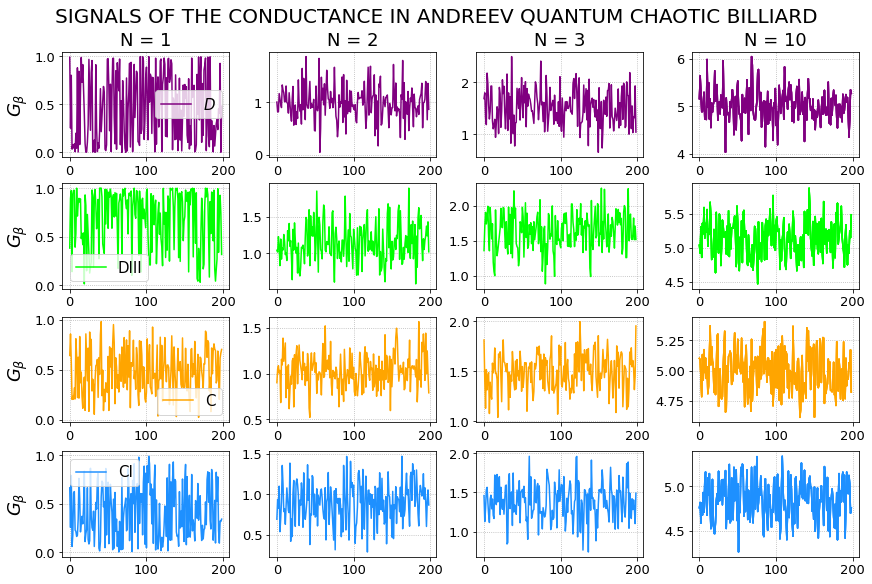

In [50]:
fig, axs = plt.subplots(4,4, figsize = (12,8), constrained_layout = True)

fig.suptitle(r'SIGNALS OF THE CONDUCTANCE IN ANDREEV QUANTUM CHAOTIC BILLIARD', fontsize = 20)

for j in range(0,4):
    for i in range(0,4):
        
        axs[i,j].tick_params(axis='both', which = 'major', labelsize = 13)
        
        if (j == 3):
            
            axs[0,3].set_title('N = 10', fontsize = 18) 
            
            axs[0,3].plot(G_D[0:199,9], color='purple', label = r'D', alpha=1);
            axs[1,3].plot(G_DIII[0:199,9], color='lime', label = r'DIII', alpha=1);
            axs[2,3].plot(G_C[0:199,9], color='orange', label = r'C', alpha=1);
            axs[3,3].plot(G_CI[0:199,9], color='dodgerblue', label = r'CI', alpha=1);
            
        else:
            axs[0,j].set_title('N = '+ str(j+1), fontsize = 18)
            if (i == 0):
                axs[i,j].plot(G_D[0:199,j], color='purple', label = r'$D$', alpha=1);
            else:
                if (i == 1):
                    axs[i,j].plot(G_DIII[0:199,j], color='lime', label = r'DIII', alpha=1);
                else:
                    if (i == 2):
                        axs[i,j].plot(G_C[0:199,j], color='orange', label = r'C', alpha=1);
                    else:
                        if (i == 3):
                            axs[i,j].plot(G_CI[0:199,j], color='dodgerblue', label = r'CI', alpha=1);
        
        if (j == 0):
            axs[i,0].set_ylabel(r'$G_{\beta}$', fontsize = 18)
            axs[i,0].legend(fontsize = 15)
            
        axs[i,j].grid(linestyle=':')

/home/rafael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/rafael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars


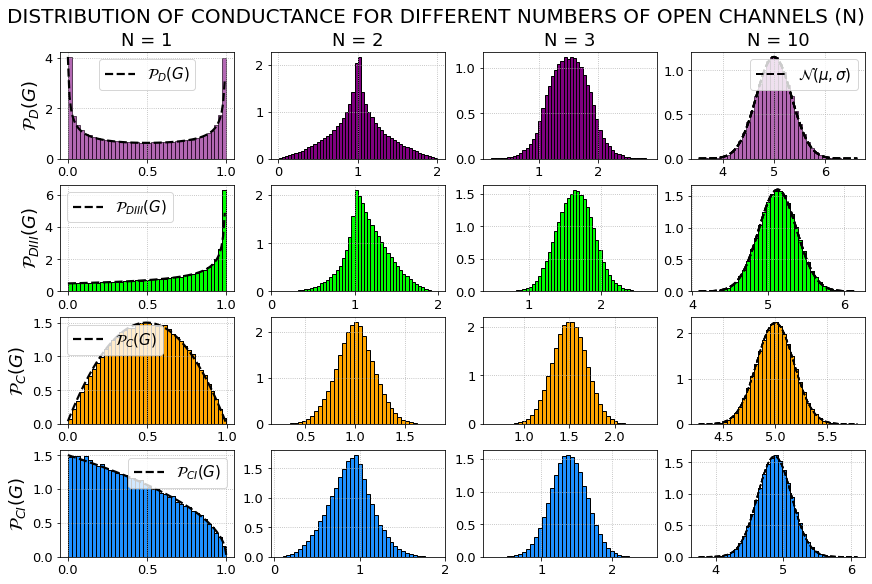

In [51]:
steps = 50

fig, axs = plt.subplots(4,4, figsize = (12,8), constrained_layout = True)

fig.suptitle(r'DISTRIBUTION OF CONDUCTANCE FOR DIFFERENT NUMBERS OF OPEN CHANNELS (N)', fontsize = 20)

for j in range(0,4):
    for i in range(0,4):
        
        axs[i,j].tick_params(axis='both', which = 'major', labelsize = 13)
        
        if (j == 0):
            
            axs[0,0].set_ylabel(r'$\mathcal{P}_{D}(G)$', fontsize = 18)
            axs[1,0].set_ylabel(r'$\mathcal{P}_{DIII}(G)$', fontsize = 18)
            axs[2,0].set_ylabel(r'$\mathcal{P}_{C}(G)$', fontsize = 18)
            axs[3,0].set_ylabel(r'$\mathcal{P}_{CI}(G)$', fontsize = 18)
            
            axs[0,0].set_title('N = 1', fontsize = 18) 
            
            axs[0,0].hist(G_D[:,0], bins = 40, color='purple', alpha=0.2, density = True, histtype='bar', ec='black');
            axs[1,0].hist(G_DIII[:,0], bins = 40, color='lime', alpha=1, density = True, histtype='bar', ec='black');
            axs[2,0].hist(G_C[:,0], bins = 40, color='orange', alpha=1, density = True, histtype='bar', ec='black');
            axs[3,0].hist(G_CI[:,0], bins = 40, color='dodgerblue', alpha=1, density = True, histtype='bar', ec='black');

            if (i == 0):
                x = np.linspace(np.min(G_D[:,0]), np.max(G_D[:,0]), 100)
                axs[0,0].plot(x, Distr_D_N1(G_D[:,0]), color = 'black', label = r'$\mathcal{P}_{D}(G)$', alpha = 1, linewidth = 2.2, linestyle = 'dashed')
                axs[0,0].legend(fontsize = 15, loc = "best")
            
            elif (i == 1):
                x = np.linspace(np.min(G_DIII[:,0]), np.max(G_DIII[:,0]), 100)
                axs[1,0].plot(x, Distr_DIII_N1(G_DIII[:,0]), color = 'black', label = r'$\mathcal{P}_{DIII}(G)$', alpha = 1, linewidth = 2.2, linestyle = 'dashed')
                axs[1,0].legend(fontsize = 15, loc = "best")
                
            elif (i == 2):
                x = np.linspace(np.min(G_C[:,0]), np.max(G_C[:,0]), 100)
                axs[2,0].plot(x, Distr_C_N1(G_C[:,0]), color = 'black', label = r'$\mathcal{P}_{C}(G)$', alpha = 1, linewidth = 2.2, linestyle = 'dashed')
                axs[2,0].legend(fontsize = 15, loc = "best")
                
            elif (i == 3):
                x = np.linspace(np.min(G_CI[:,0]), np.max(G_CI[:,0]), 100)
                axs[3,0].plot(x, Distr_CI_N1(G_CI[:,0]), color = 'black', label = r'$\mathcal{P}_{CI}(G)$', alpha = 1, linewidth = 2.2, linestyle = 'dashed')
                axs[3,0].legend(fontsize = 15, loc = "best")
            
        elif (j == 3):
            
            axs[0,3].set_title('N = 10', fontsize = 18) 
            
            axs[0,3].hist(G_D[:,9], bins = 40, color='purple', alpha=0.2, density = True, histtype='bar', ec='black');
            axs[1,3].hist(G_DIII[:,9], bins = 40, color='lime', alpha=1, density = True, histtype='bar', ec='black');
            axs[2,3].hist(G_C[:,9], bins = 40, color='orange', alpha=1, density = True, histtype='bar', ec='black');
            axs[3,3].hist(G_CI[:,9], bins = 40, color='dodgerblue', alpha=1, density = True, histtype='bar', ec='black');

            x = np.linspace(np.min(G_D[:,9]), np.max(G_D[:,9]), 100)
            axs[0,3].plot(x,Gaussian(G_D[:,9]), color = 'black', label = r'$\mathcal{N}(\mu,\sigma)$', alpha = 1, linewidth = 2, linestyle = 'dashed')
            
            x = np.linspace(np.min(G_DIII[:,9]), np.max(G_DIII[:,9]), 100)
            axs[1,3].plot(x,Gaussian(G_DIII[:,9]), color = 'black', alpha = 1, linewidth = 2, linestyle = 'dashed')

            x = np.linspace(np.min(G_C[:,9]), np.max(G_C[:,9]), 100)
            axs[2,3].plot(x,Gaussian(G_C[:,9]), color = 'black', alpha = 1, linewidth = 1.5, linestyle = 'dashed')
            
            x = np.linspace(np.min(G_CI[:,9]), np.max(G_CI[:,9]), 100)
            axs[3,3].plot(x,Gaussian(G_CI[:,9]), color = 'black', alpha = 1, linewidth = 1.5, linestyle = 'dashed')

            
        else:
            axs[0,j].set_title('N = '+ str(j+1), fontsize = 18)
            if (i == 0):
                axs[i,j].hist(G_D[:,j], bins = 50, color='purple', label = r'D', alpha=1, density = True, histtype='bar', ec='black');
            else:
                if (i == 1):
                    axs[i,j].hist(G_DIII[:,j], bins = 50, color='lime', label = r'DIII', alpha=1, density = True, histtype='bar', ec='black');
                else:
                    if (i == 2):
                        axs[i,j].hist(G_C[:,j], bins = 40, color='orange', label = r'C', alpha=1, density = True, histtype='bar', ec='black');
                    else:
                        if (i == 3):
                            axs[i,j].hist(G_CI[:,j], bins = 40, color='dodgerblue', label = r'CI', alpha=1, density = True, histtype='bar', ec='black');
            
        
        if (j == 3 and i == 0):
            axs[0,3].legend(fontsize = 15, loc = 'best')
        
        axs[i,j].grid(linestyle=':')

/home/rafael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/rafael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars


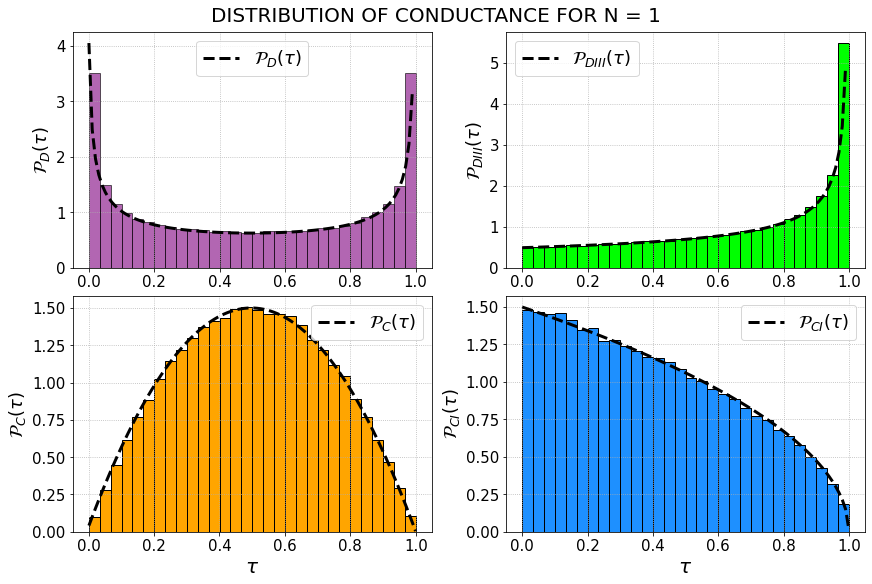

In [52]:
steps = 50

fig, axs = plt.subplots(2,2, figsize = (12,8), constrained_layout = True)

fig.suptitle(r'DISTRIBUTION OF CONDUCTANCE FOR N = 1', fontsize = 20)

         
axs[0,0].hist(G_D[:,0], bins = 30, color='purple', alpha=0.6, density = True, histtype='bar', ec='black');
x = np.linspace(np.min(G_D[:,0]), np.max(G_D[:,0]), 100)
axs[0,0].plot(x, Distr_D_N1(G_D[:,0]), color = 'black', label = r'$\mathcal{P}_{D}(\tau)$', alpha = 1, linewidth = 3, linestyle = 'dashed')
axs[0,0].set_ylabel(r'$\mathcal{P}_{D}(\tau)$', fontsize = 18)
axs[0,0].legend(fontsize = 18, loc = 'best')

axs[0,1].hist(G_DIII[:,0], bins = 30, color='lime', alpha=1, density = True, histtype='bar', ec='black');
x = np.linspace(np.min(G_DIII[:,0]), np.max(G_DIII[:,0]), 100)
axs[0,1].plot(x, Distr_DIII_N1(G_D[:,0]), color = 'black', label = r'$\mathcal{P}_{DIII}(\tau)$', alpha = 1, linewidth = 3, linestyle = 'dashed')
axs[0,1].set_ylabel(r'$\mathcal{P}_{DIII}(\tau)$', fontsize = 18)
axs[0,1].legend(fontsize = 18, loc = 'best')

axs[1,0].hist(G_C[:,0], bins = 30, color='orange', alpha=1, density = True, histtype='bar', ec='black');
x = np.linspace(np.min(G_C[:,0]), np.max(G_C[:,0]), 100)
axs[1,0].set_ylabel(r'$\mathcal{P}_{C}(\tau)$', fontsize = 18)
axs[1,0].plot(x, Distr_C_N1(G_C[:,0]), color = 'black', label = r'$\mathcal{P}_{C}(\tau)$', alpha = 1, linewidth = 3, linestyle = 'dashed')
axs[1,0].legend(fontsize = 18, loc = 'best')

axs[1,1].hist(G_CI[:,0], bins = 30, color='dodgerblue', alpha=1, density = True, histtype='bar', ec='black');
x = np.linspace(np.min(G_CI[:,0]), np.max(G_CI[:,0]), 100)
axs[1,1].set_ylabel(r'$\mathcal{P}_{CI}(\tau)$', fontsize = 18)
axs[1,1].plot(x, Distr_CI_N1(G_CI[:,0]), color = 'black', label = r'$\mathcal{P}_{CI}(\tau)$', alpha = 1, linewidth = 3, linestyle = 'dashed')
axs[1,1].legend(fontsize = 18, loc = 'best')

axs[1,0].set_xlabel(r'$\tau$', fontsize = 20)
axs[1,1].set_xlabel(r'$\tau$', fontsize = 20)

for i in range(2):
    for j in range(2):
        axs[i,j].tick_params(axis='both', which = 'major', labelsize = 15)
        axs[i,j].grid(linestyle=':')

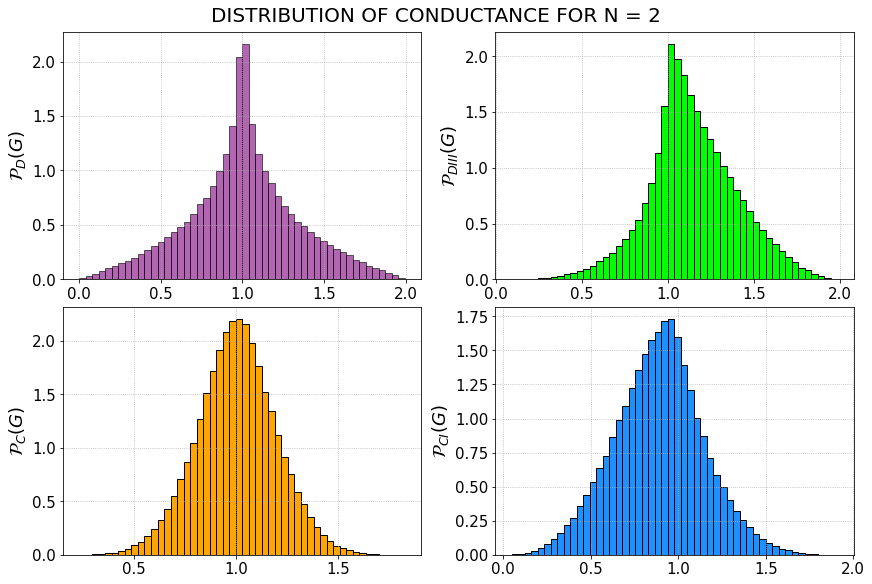

In [53]:
steps = 50

fig, axs = plt.subplots(2,2, figsize = (12,8), constrained_layout = True)

fig.suptitle(r'DISTRIBUTION OF CONDUCTANCE FOR N = 2', fontsize = 20)

         
axs[0,0].hist(G_D[:,1], bins = 50, color='purple', alpha=0.6, density = True, histtype='bar', ec='black');
x = np.linspace(np.min(G_D[:,1]), np.max(G_D[:,1]), 100)
#axs[0,0].plot(x, Distr_D_N1(G_D[:,1]), color = 'black', label = r'$\mathcal{P}_{D}(G)$', alpha = 1, linewidth = 3, linestyle = 'dashed')
axs[0,0].set_ylabel(r'$\mathcal{P}_{D}(G)$', fontsize = 18)
#axs[0,0].legend(fontsize = 18, loc = 'best')

axs[0,1].hist(G_DIII[:,1], bins = 50, color='lime', alpha=1, density = True, histtype='bar', ec='black');
x = np.linspace(np.min(G_DIII[:,0]), np.max(G_DIII[:,0]), 100)
#axs[0,1].plot(x, Distr_DIII_N1(G_D[:,0]), color = 'black', label = r'$\mathcal{P}_{DIII}(G)$', alpha = 1, linewidth = 3, linestyle = 'dashed')
axs[0,1].set_ylabel(r'$\mathcal{P}_{DIII}(G)$', fontsize = 18)
#axs[0,1].legend(fontsize = 18, loc = 'best')

axs[1,0].hist(G_C[:,1], bins = 50, color='orange', alpha=1, density = True, histtype='bar', ec='black');
x = np.linspace(np.min(G_C[:,0]), np.max(G_C[:,0]), 100)
axs[1,0].set_ylabel(r'$\mathcal{P}_{C}(G)$', fontsize = 18)
#axs[1,0].plot(x, Distr_C_N1(G_C[:,0]), color = 'black', label = r'$\mathcal{P}_{C}(G)$', alpha = 1, linewidth = 3, linestyle = 'dashed')
#axs[1,0].legend(fontsize = 18, loc = 'best')

axs[1,1].hist(G_CI[:,1], bins = 50, color='dodgerblue', alpha=1, density = True, histtype='bar', ec='black');
x = np.linspace(np.min(G_CI[:,0]), np.max(G_CI[:,0]), 100)
axs[1,1].set_ylabel(r'$\mathcal{P}_{CI}(G)$', fontsize = 18)
#axs[1,1].plot(x, Distr_CI_N1(G_CI[:,0]), color = 'black', label = r'$\mathcal{P}_{CI}(G)$', alpha = 1, linewidth = 3, linestyle = 'dashed')
#axs[1,1].legend(fontsize = 18, loc = 'best')

for i in range(2):
    for j in range(2):
        axs[i,j].tick_params(axis='both', which = 'major', labelsize = 15)
        axs[i,j].grid(linestyle=':')

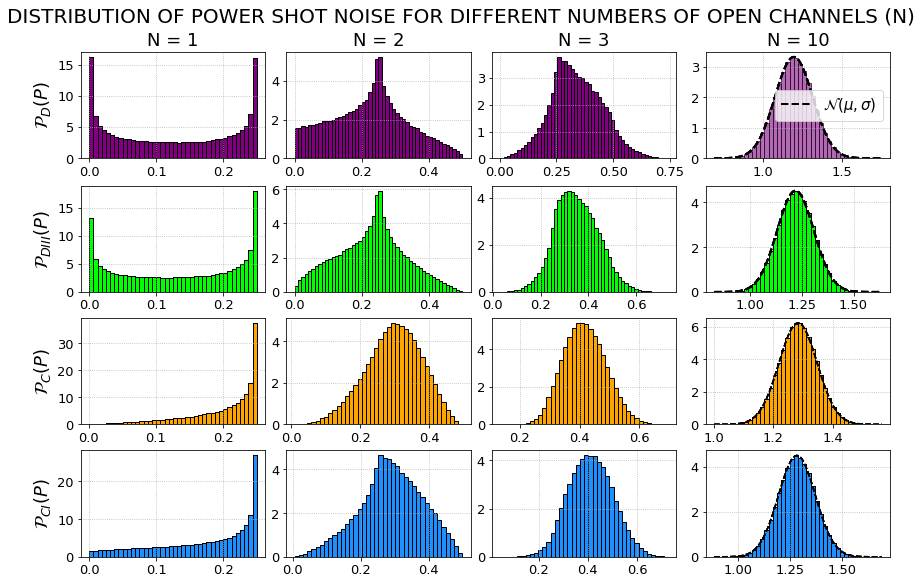

In [54]:
steps = 50

fig, axs = plt.subplots(4,4, figsize = (12,8), constrained_layout = True)

fig.suptitle(r'DISTRIBUTION OF POWER SHOT NOISE FOR DIFFERENT NUMBERS OF OPEN CHANNELS (N)', fontsize = 20)

for j in range(0,4):
    for i in range(0,4):
        
        axs[i,j].tick_params(axis='both', which = 'major', labelsize = 13)
        
        if (j == 0):
            
            axs[0,0].set_ylabel(r'$\mathcal{P}_{D}(P)$', fontsize = 18)
            axs[1,0].set_ylabel(r'$\mathcal{P}_{DIII}(P)$', fontsize = 18)
            axs[2,0].set_ylabel(r'$\mathcal{P}_{C}(P)$', fontsize = 18)
            axs[3,0].set_ylabel(r'$\mathcal{P}_{CI}(P)$', fontsize = 18)
            
            axs[0,0].set_title('N = 1', fontsize = 18) 
            
            axs[0,0].hist(P_D[:,0], bins = 40, color='purple', alpha=1, density = True, histtype='bar', ec='black');
            axs[1,0].hist(P_DIII[:,0], bins = 40, color='lime', alpha=1, density = True, histtype='bar', ec='black');
            axs[2,0].hist(P_C[:,0], bins = 40, color='orange', alpha=1, density = True, histtype='bar', ec='black');
            axs[3,0].hist(P_CI[:,0], bins = 40, color='dodgerblue', alpha=1, density = True, histtype='bar', ec='black');

            
        elif (j == 3):
            
            axs[0,3].set_title('N = 10', fontsize = 18) 
            
            axs[0,3].hist(P_D[:,9], bins = 40, color='purple', alpha=0.2, density = True, histtype='bar', ec='black');
            axs[1,3].hist(P_DIII[:,9], bins = 40, color='lime', alpha=1, density = True, histtype='bar', ec='black');
            axs[2,3].hist(P_C[:,9], bins = 40, color='orange', alpha=1, density = True, histtype='bar', ec='black');
            axs[3,3].hist(P_CI[:,9], bins = 40, color='dodgerblue', alpha=1, density = True, histtype='bar', ec='black');

            x = np.linspace(np.min(P_D[:,9]), np.max(P_D[:,9]), 100)
            axs[0,3].plot(x,Gaussian(P_D[:,9]), color = 'black', label = r'$\mathcal{N}(\mu,\sigma)$', alpha = 1, linewidth = 2, linestyle = 'dashed')
            
            x = np.linspace(np.min(P_DIII[:,9]), np.max(P_DIII[:,9]), 100)
            axs[1,3].plot(x,Gaussian(P_DIII[:,9]), color = 'black', alpha = 1, linewidth = 2, linestyle = 'dashed')

            x = np.linspace(np.min(P_C[:,9]), np.max(P_C[:,9]), 100)
            axs[2,3].plot(x,Gaussian(P_C[:,9]), color = 'black', alpha = 1, linewidth = 1.5, linestyle = 'dashed')
            
            x = np.linspace(np.min(P_CI[:,9]), np.max(P_CI[:,9]), 100)
            axs[3,3].plot(x,Gaussian(P_CI[:,9]), color = 'black', alpha = 1, linewidth = 1.5, linestyle = 'dashed')

            
        else:
            axs[0,j].set_title('N = '+ str(j+1), fontsize = 18)
            if (i == 0):
                axs[i,j].hist(P_D[:,j], bins = 50, color='purple', label = r'D', alpha=1, density = True, histtype='bar', ec='black');
            else:
                if (i == 1):
                    axs[i,j].hist(P_DIII[:,j], bins = 50, color='lime', label = r'DIII', alpha=1, density = True, histtype='bar', ec='black');
                else:
                    if (i == 2):
                        axs[i,j].hist(P_C[:,j], bins = 40, color='orange', label = r'C', alpha=1, density = True, histtype='bar', ec='black');
                    else:
                        if (i == 3):
                            axs[i,j].hist(P_CI[:,j], bins = 40, color='dodgerblue', label = r'CI', alpha=1, density = True, histtype='bar', ec='black');
            
        
        if (j == 3 and i == 0):
            axs[0,3].legend(fontsize = 15, loc = 'best')
        
        axs[i,j].grid(linestyle=':')

/home/rafael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/rafael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in double_scalars


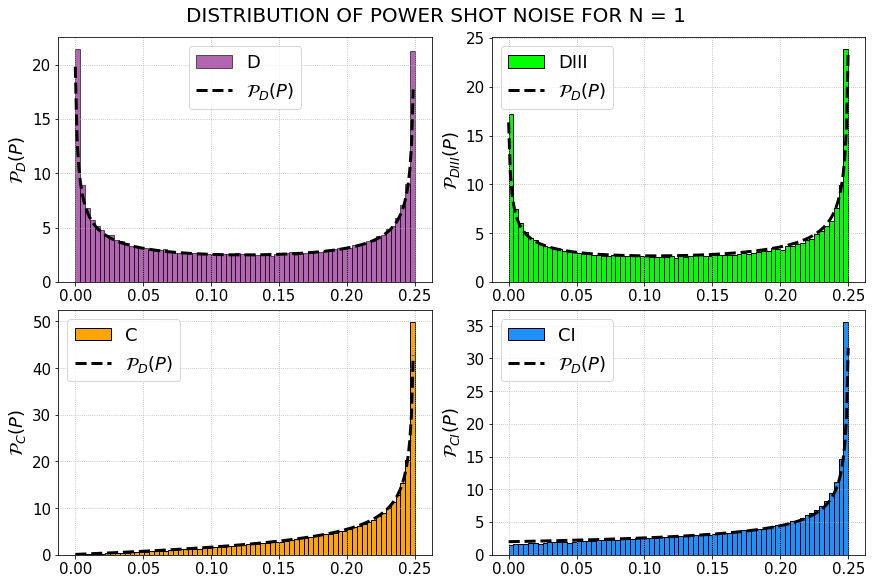

In [55]:
steps = 50

fig, axs = plt.subplots(2,2, figsize = (12,8), constrained_layout = True)

fig.suptitle(r'DISTRIBUTION OF POWER SHOT NOISE FOR N = 1', fontsize = 20)

axs[0,0].hist(P_D[:,0], bins = 70, color='purple', label = 'D', alpha=0.6, density = True, histtype='bar', ec='black');
axs[0,0].plot(np.linspace(0,0.25,200), Distr_D_N1_Noise(P_D[:,0]), color = 'black', label = r'$\mathcal{P}_{D}(P)$', alpha = 1, linewidth = 3, linestyle = 'dashed')
axs[0,0].set_ylabel(r'$\mathcal{P}_{D}(P)$', fontsize = 18)
axs[0,0].legend(fontsize = 18, loc = 'best')

axs[0,1].hist(P_DIII[:,0], bins = 70, color='lime', label = 'DIII', alpha=1, density = True, histtype='bar', ec='black');
axs[0,1].plot(np.linspace(0,0.25,200), Distr_DIII_N1_Noise(P_DIII[:,0]), color = 'black', label = r'$\mathcal{P}_{D}(P)$', alpha = 1, linewidth = 3, linestyle = 'dashed')
axs[0,1].set_ylabel(r'$\mathcal{P}_{DIII}(P)$', fontsize = 18)
axs[0,1].legend(fontsize = 18, loc = 'best')

axs[1,0].hist(P_C[:,0], bins = 70, color='orange', label = 'C', alpha=1, density = True, histtype='bar', ec='black');
axs[1,0].plot(np.linspace(0,0.25,200), Distr_C_N1_Noise(P_C[:,0]), color = 'black', label = r'$\mathcal{P}_{D}(P)$', alpha = 1, linewidth = 3, linestyle = 'dashed')
axs[1,0].set_ylabel(r'$\mathcal{P}_{C}(P)$', fontsize = 18)
axs[1,0].legend(fontsize = 18, loc = 'best')

axs[1,1].hist(P_CI[:,0], bins = 70, color='dodgerblue', label = 'CI', alpha=1, density = True, histtype='bar', ec='black');
axs[1,1].plot(np.linspace(0,0.25,200), Distr_CI_N1_Noise(P_CI[:,0]), color = 'black', label = r'$\mathcal{P}_{D}(P)$', alpha = 1, linewidth = 3, linestyle = 'dashed')
axs[1,1].set_ylabel(r'$\mathcal{P}_{CI}(P)$', fontsize = 18)
axs[1,1].legend(fontsize = 18, loc = 'best')

for i in range(2):
    for j in range(2):
        axs[i,j].tick_params(axis='both', which = 'major', labelsize = 15)
        axs[i,j].grid(linestyle=':')

In [56]:
meanG_D = np.mean(G_D, axis = 0)
meanG_DIII = np.mean(G_DIII, axis = 0)
meanG_C = np.mean(G_C, axis = 0)
meanG_CI = np.mean(G_CI, axis = 0)

varG_D = np.var(G_D, axis = 0)
varG_DIII = np.var(G_DIII, axis = 0)
varG_C = np.var(G_C, axis = 0)
varG_CI = np.var(G_CI, axis = 0)

meanP_D = np.mean(P_D, axis = 0)
meanP_DIII = np.mean(P_DIII, axis = 0)
meanP_C = np.mean(P_C, axis = 0)
meanP_CI = np.mean(P_CI, axis = 0)

varP_D = np.var(P_D, axis = 0)
varP_DIII = np.var(P_DIII, axis = 0)
varP_C = np.var(P_C, axis = 0)
varP_CI = np.var(P_CI, axis = 0)

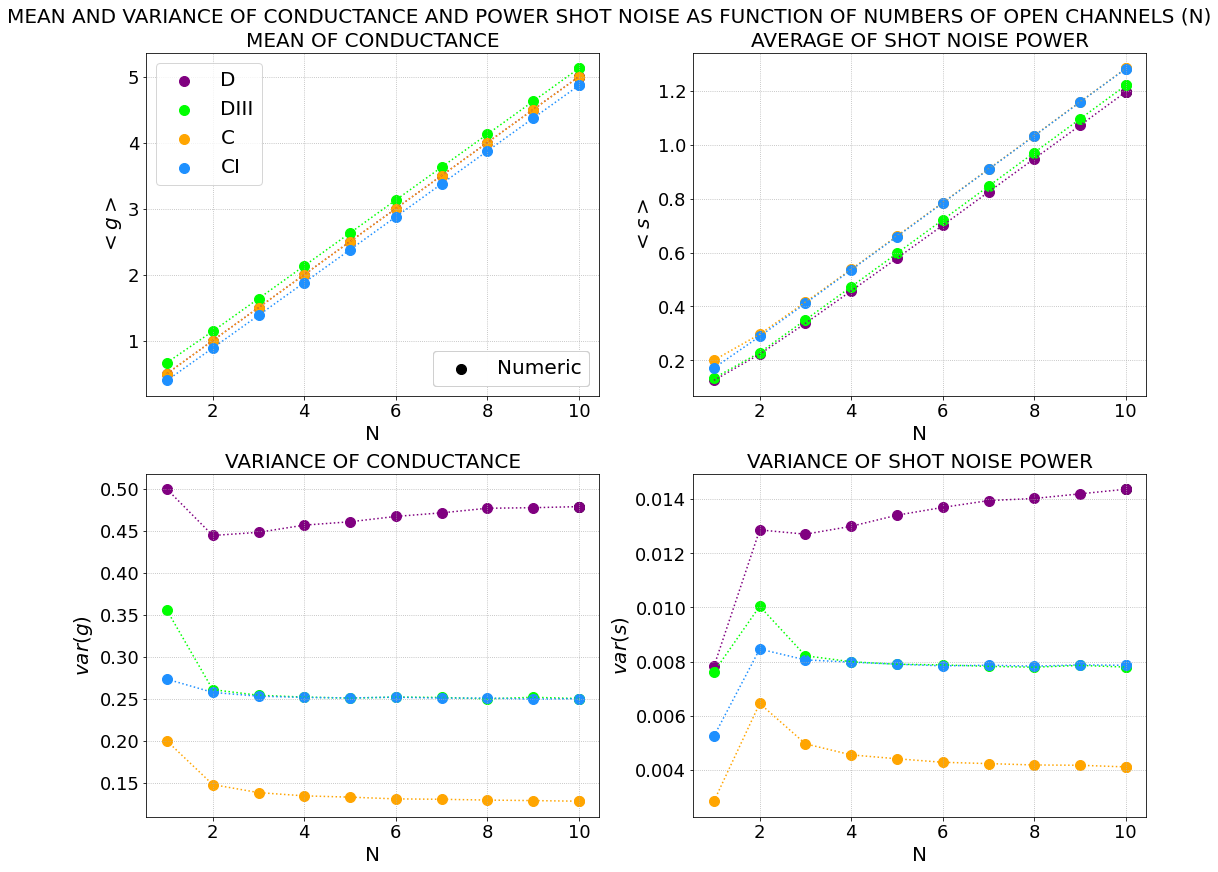

In [57]:
#meanG_O_aux = np.empty(10, dtype = float)
#meanG_U_aux = np.empty(10, dtype = float)
#meanG_S_aux = np.empty(10, dtype = float)

#varG_O_aux = np.empty(10, dtype = float)
#varG_U_aux = np.empty(10, dtype = float)
#varG_S_aux = np.empty(10, dtype = float)

#for N1 in range(1,11):
    
#    N2 = N1
#    NT = N1 + N2

#    meanG_O_aux[N1-1] = (1/2)*(4*1*(N1*N2*NT))/((1*NT+1)*(2*NT-1))
#    meanG_U_aux[N1-1] = (1/2)*(4*2*(N1*N2*NT))/((2*NT+1)*(2*NT-1))
#    meanG_S_aux[N1-1] = (1/2)*(4*4*(N1*N2*NT))/((4*NT+1)*(2*NT-1))
#    
#    varG_O_aux[N1-1] = (1/4)*(16*N1*N2*NT*(3+2*np.power(NT,3)+4*N1*N2*np.power(NT,2)-4*NT-4*N1*N2-5*np.power(N1,2)-5*np.power(N2,2)))/((2*NT-3)*((np.power((2*NT-1),2)))*(NT+3)*(np.power((NT+1),2))*(2*NT+1))
#    varG_U_aux[N1-1] = (1/4)*(8*N1*N2*(3+16*N1*N2*np.power(NT,2)-6*np.power(NT,2)-6*np.power(N1,2)-6*np.power(N2,2)))/((2*NT-3)*(2*NT+3)*(np.power((2*NT+1),2))*(np.power((2*NT-1),2)))
#    varG_S_aux[N1-1] = (1/4)*(32*N1*N2*NT*(3-16*N1*N2+8*NT-20*np.power(N1,2)-20*np.power(N2,2)-16*np.power(NT,3)+64*N1*N2*np.power(NT,2)))/((4*NT+3)*(np.power((4*NT+1),2))*(2*NT-3)*(np.power((2*NT-1),2))*(4*NT-1))

fig, axs = plt.subplots(2,2, figsize = (15,12), constrained_layout = True)

fig.suptitle(r'MEAN AND VARIANCE OF CONDUCTANCE AND POWER SHOT NOISE AS FUNCTION OF NUMBERS OF OPEN CHANNELS (N)', fontsize = 20)

for i in range(0,2):
    for j in range(0,2):
        
        if (i == 0) and (j == 0):
            axs[0,0].set_title('MEAN OF CONDUCTANCE', fontsize = 20)
            axs[0,0].set_ylabel(r'$<g>$', fontsize = 20)
            
            variable_D = meanG_D; variable_DIII = meanG_DIII; variable_C = meanG_C; variable_CI = meanG_CI
            
        else:
            if (i == 1) and (j == 0):
  
                axs[1,0].set_title('VARIANCE OF CONDUCTANCE', fontsize = 20)
                axs[1,0].set_ylabel(r'$var(g)$', fontsize = 20)
            
                variable_D = 4*varG_D; variable_DIII = 4*varG_DIII; variable_C = 4*varG_C; variable_CI = 4*varG_CI
            
            else:
                if (i == 0) and (j == 1):
                    
                    axs[0,1].set_title('AVERAGE OF SHOT NOISE POWER', fontsize = 20)
                    axs[0,1].set_ylabel(r'$<s>$', fontsize = 20)
                    
                    variable_D = meanP_D; variable_DIII = meanP_DIII; variable_C = meanP_C; variable_CI = meanP_CI
                    
                else:
                    if (i == 1) and (j == 1):
                        axs[1,1].set_title('VARIANCE OF SHOT NOISE POWER', fontsize = 20)
                        axs[1,1].set_ylabel(r'$var(s)$', fontsize = 20)
                        #axs[1,1].set_ylim([0,0.018])

                        variable_D = varP_D; variable_DIII = varP_DIII; variable_C = varP_C; variable_CI = varP_CI
        
        
        for k in range(0,len(meanG_D)):
            axs[i,j].scatter((k+1), variable_D[k], s = 100, color = 'purple', alpha = 1)
            axs[i,j].scatter((k+1), variable_DIII[k], s = 100, color = 'lime', alpha = 1)
            axs[i,j].scatter((k+1), variable_C[k], s = 100, color = 'orange', alpha = 1)
            axs[i,j].scatter((k+1), variable_CI[k], s = 100, color = 'dodgerblue', alpha = 1)
            
            if k == (len(meanG_D)-1):
                Numeric_scatter = axs[i,j].scatter((k+1), variable_D[k], label = 'Numeric', s = 100, color = 'black', alpha = 1)
                Class_D = axs[i,j].scatter((k+1), variable_D[k], label = r'D', s = 100, color = 'purple', alpha = 1)
                Class_DIII = axs[i,j].scatter((k+1), variable_DIII[k], label = r'DIII', s = 100, color = 'lime', alpha = 1)
                Class_C = axs[i,j].scatter((k+1), variable_C[k], label = r'C', s = 100, color = 'orange', alpha = 1)
                Class_CI = axs[i,j].scatter((k+1), variable_CI[k], label = r'CI', s = 100, color = 'dodgerblue', alpha = 1)

        axs[i,j].plot([i for i in range(1,11)], variable_D, color = 'purple', linestyle = ':')
        axs[i,j].plot([i for i in range(1,11)], variable_DIII, color = 'lime', linestyle = ':')
        axs[i,j].plot([i for i in range(1,11)], variable_C, color = 'orange', linestyle = ':')
        axs[i,j].plot([i for i in range(1,11)], variable_CI, color = 'dodgerblue', linestyle = ':')
        
#        if (i == 0 and j == 0):
#            Exact_plot, = axs[0,0].plot([i for i in range(1,11)], meanG_O_aux, label = 'Exact', color = 'black', linestyle = '-')
#            axs[0,0].plot([i for i in range(1,11)], meanG_O_aux, color = 'dodgerblue', linestyle = '-')
#            axs[0,0].plot([i for i in range(1,11)], meanG_U_aux, color = 'red', linestyle = '-')
#            axs[0,0].plot([i for i in range(1,11)], meanG_S_aux, color = 'lime', linestyle = '-')
        
#        if (i == 1 and j == 0):
#            axs[1,0].plot([i for i in range(1,11)], varG_O_aux , color = 'dodgerblue', linestyle = '-')
#            axs[1,0].plot([i for i in range(1,11)], varG_U_aux, color = 'red', linestyle = '-')
#            axs[1,0].plot([i for i in range(1,11)], varG_S_aux, color = 'lime', linestyle = '-')

        axs[i,j].grid(linestyle=':')
        first_legend = axs[0,0].legend([Numeric_scatter], ["Numeric"], loc = "lower right", fontsize = 20)
        axs[0,0].add_artist(first_legend)
        axs[0,0].legend([Class_D, Class_DIII, Class_C, Class_CI], [r'D', r'DIII', r'C', r'CI'], loc = "upper left", fontsize = 20)

        axs[i,j].set_xlabel('N', fontsize = 20)
        axs[i,j].tick_params(axis = 'both', which = 'major', labelsize = 18)

In [58]:
meanG_U = np.empty(10, dtype = float)

for i in range(10):
    N1 = i+1
    N2 = N1
    meanG_U[i] = N1*N2/(N1+N2)

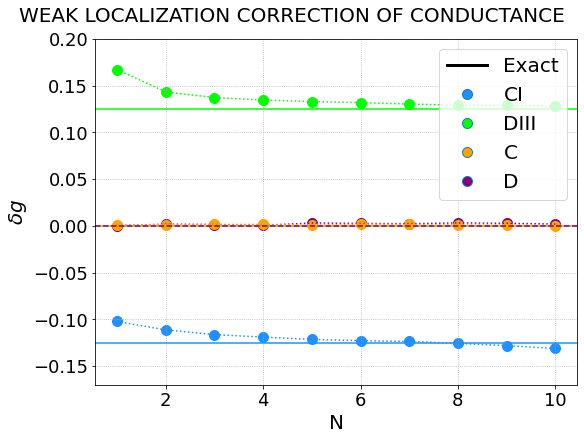

In [59]:
delta_g_D = ((1/1)*(1-2-(-1)))*(1/4)
delta_g_DIII = ((1/2)*(2-2-(-1)))*(1/4)
delta_g_C = ((1/4)*(4-2-(2)))*(1/4)
delta_g_CI = ((1/2)*(2-2-(1)))*(1/4)

fig, axs = plt.subplots(1,1, figsize = (8,6), constrained_layout = True)

fig.suptitle(r'WEAK LOCALIZATION CORRECTION OF CONDUCTANCE', fontsize = 20)

axs.plot([i for i in range(1,11)], (meanG_D - meanG_U), color = 'purple', linestyle = ':', alpha = 1)
axs.plot([i for i in range(1,11)], (meanG_DIII - meanG_U), color = 'lime', linestyle = ':', alpha = 1)
axs.plot([i for i in range(1,11)], (meanG_C - meanG_U), color = 'orange', linestyle = ':', alpha = 1)
axs.plot([i for i in range(1,11)], (meanG_CI - meanG_U), color = 'dodgerblue', linestyle = ':', alpha = 1)

axs.scatter([i for i in range(1,11)], (meanG_D - meanG_U), label = 'CRE', s = 100, color = 'purple', alpha = 1)
axs.scatter([i for i in range(1,11)], (meanG_DIII - meanG_U), label = 'T-CRE' , s = 100, color = 'lime', alpha = 1)
axs.scatter([i for i in range(1,11)], (meanG_C - meanG_U), label = 'CQE', s = 100, color = 'orange', alpha = 1)
axs.scatter([i for i in range(1,11)], (meanG_CI - meanG_U), label = 'T-CQE', s = 100, color = 'dodgerblue', alpha = 1)

axs.set_xlabel('N', fontsize = 20)
axs.tick_params(axis = 'both', which = 'major', labelsize = 18)
axs.set_ylabel(r'$\delta g$', fontsize = 20)
axs.grid(linestyle=':')
axs.legend(loc = "lower left", fontsize = 20)

axs.axhline(y=delta_g_CI, color='dodgerblue', linestyle='-')
axs.axhline(y=delta_g_C, color='orange', linestyle='-')
axs.axhline(y=delta_g_DIII, color='lime', linestyle='-')
axs.axhline(y=delta_g_D, color='purple', linestyle='dashed')

axs.set_ylim([-0.17, 0.2])

point_betaCI = Line2D([0], [0], label=r'CI', marker = 'o', markersize=10, markerfacecolor='dodgerblue', linestyle='')
point_betaC = Line2D([0], [0], label=r'C', marker = 'o', markersize=10, markerfacecolor='orange', linestyle='')
point_betaDIII = Line2D([0], [0], label=r'DIII', marker = 'o', markersize=10, markerfacecolor='lime', linestyle='')
point_betaD = Line2D([0], [0], label=r'D', marker = 'o', markersize=10, markerfacecolor='purple', linestyle='')
exact_line = Line2D([0], [0], color='black', label='Exact', linewidth = '3')
plt.legend(handles=[exact_line, point_betaCI, point_betaDIII, point_betaC, point_betaD], fontsize = 20, loc = "upper right")

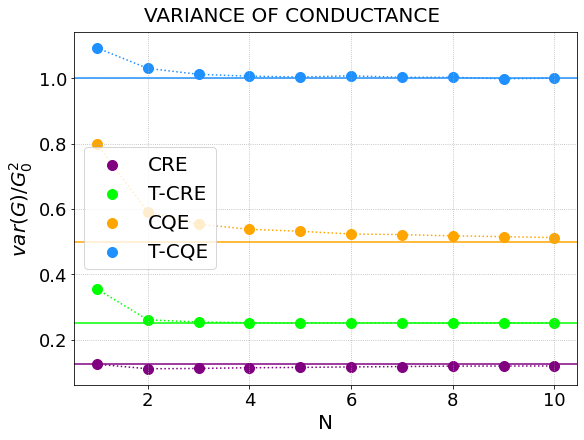

In [60]:
varG_D_aux = np.var(G_D, axis = 0)
varG_DIII_aux = np.var(2*G_DIII, axis = 0)
varG_C_aux = np.var(4*G_C, axis = 0)
varG_CI_aux = np.var(4*G_CI, axis = 0)

fig, axs = plt.subplots(1,1, figsize = (8,6), constrained_layout = True)

fig.suptitle(r'VARIANCE OF CONDUCTANCE', fontsize = 20)

axs.plot([i for i in range(1,11)], varG_D_aux, color = 'purple', linestyle = ':', alpha = 1)
axs.plot([i for i in range(1,11)], varG_DIII_aux, color = 'lime', linestyle = ':', alpha = 1)
axs.plot([i for i in range(1,11)], varG_C_aux, color = 'orange', linestyle = ':', alpha = 1)
axs.plot([i for i in range(1,11)], varG_CI_aux, color = 'dodgerblue', linestyle = ':', alpha = 1)

axs.scatter([i for i in range(1,11)], varG_D_aux, label = 'CRE', s = 100, color = 'purple', alpha = 1)
axs.scatter([i for i in range(1,11)], varG_DIII_aux, label = 'T-CRE' , s = 100, color = 'lime', alpha = 1)
axs.scatter([i for i in range(1,11)], varG_C_aux, label = 'CQE', s = 100, color = 'orange', alpha = 1)
axs.scatter([i for i in range(1,11)], varG_CI_aux, label = 'T-CQE', s = 100, color = 'dodgerblue', alpha = 1)

axs.set_xlabel('N', fontsize = 20)
axs.tick_params(axis = 'both', which = 'major', labelsize = 18)
axs.set_ylabel(r'$var(G)/G_{0}^{2}$', fontsize = 20)
axs.grid(linestyle=':')
axs.legend(loc = "best", fontsize = 20)

axs.axhline(y=(1/1), color='dodgerblue', linestyle='-')
axs.axhline(y=(1/2), color='orange', linestyle='-')
axs.axhline(y=(1/4), color='lime', linestyle='-')
axs.axhline(y=(1/8), color='purple', linestyle='-')

In [61]:
df_G_D_Gamma_N1 = pd.read_csv(r'Gamma/Andreev_G_D_Gamma_N1.txt', sep='\t', header = None)
df_G_DIII_Gamma_N1 = (1/2)*pd.read_csv(r'Gamma/Andreev_G_DIII_Gamma_N1.txt', sep='\t', header = None)
df_G_C_Gamma_N1 = (1/2)*pd.read_csv(r'Gamma/Andreev_G_C_Gamma_N1.txt', sep='\t', header = None)
df_G_CI_Gamma_N1 = (1/2)*pd.read_csv(r'Gamma/Andreev_G_CI_Gamma_N1.txt', sep='\t', header = None)

df_G_D_Gamma_N2 = pd.read_csv(r'Gamma/Andreev_G_D_Gamma_N2.txt', sep='\t', header = None)
df_G_DIII_Gamma_N2 = (1/2)*pd.read_csv(r'Gamma/Andreev_G_DIII_Gamma_N2.txt', sep='\t', header = None)
df_G_C_Gamma_N2 = (1/2)*pd.read_csv(r'Gamma/Andreev_G_C_Gamma_N2.txt', sep='\t', header = None)
df_G_CI_Gamma_N2 = (1/2)*pd.read_csv(r'Gamma/Andreev_G_CI_Gamma_N2.txt', sep='\t', header = None)

df_G_D_Gamma_N3 = pd.read_csv(r'Gamma/Andreev_G_D_Gamma_N3.txt', sep='\t', header = None)
df_G_DIII_Gamma_N3 = (1/2)*pd.read_csv(r'Gamma/Andreev_G_DIII_Gamma_N3.txt', sep='\t', header = None)
df_G_C_Gamma_N3 = (1/2)*pd.read_csv(r'Gamma/Andreev_G_C_Gamma_N3.txt', sep='\t', header = None)
df_G_CI_Gamma_N3 = (1/2)*pd.read_csv(r'Gamma/Andreev_G_CI_Gamma_N3.txt', sep='\t', header = None)

df_G_D_Gamma_N10 = pd.read_csv(r'Gamma/Andreev_G_D_Gamma_N10.txt', sep='\t', header = None)
df_G_DIII_Gamma_N10 = (1/2)*pd.read_csv(r'Gamma/Andreev_G_DIII_Gamma_N10.txt', sep='\t', header = None)
df_G_C_Gamma_N10 = (1/2)*pd.read_csv(r'Gamma/Andreev_G_C_Gamma_N10.txt', sep='\t', header = None)
df_G_CI_Gamma_N10 = (1/2)*pd.read_csv(r'Gamma/Andreev_G_CI_Gamma_N10.txt', sep='\t', header = None)

G_D_Gamma_N1 = df_G_D_Gamma_N1.values
G_DIII_Gamma_N1 = df_G_DIII_Gamma_N1.values
G_C_Gamma_N1 = df_G_C_Gamma_N1.values
G_CI_Gamma_N1 = df_G_CI_Gamma_N1.values

G_D_Gamma_N2 = df_G_D_Gamma_N2.values
G_DIII_Gamma_N2 = df_G_DIII_Gamma_N2.values
G_C_Gamma_N2 = df_G_C_Gamma_N2.values
G_CI_Gamma_N2 = df_G_CI_Gamma_N2.values

G_D_Gamma_N3 = df_G_D_Gamma_N3.values
G_DIII_Gamma_N3 = df_G_DIII_Gamma_N3.values
G_C_Gamma_N3 = df_G_C_Gamma_N3.values
G_CI_Gamma_N3 = df_G_CI_Gamma_N3.values

G_D_Gamma_N10 = df_G_D_Gamma_N10.values
G_DIII_Gamma_N10 = df_G_DIII_Gamma_N10.values
G_C_Gamma_N10 = df_G_C_Gamma_N10.values
G_CI_Gamma_N10 = df_G_CI_Gamma_N10.values

In [62]:
df_G_D_Gamma_N1

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,6.865680e-10,0.000043,0.005450,0.411473,0.101527,0.070408,0.207108,0.920568,0.038606,0.000011,...,0.990176,0.000523,0.361592,0.066302,0.161713,0.478888,0.001078,5.312510e-01,0.057215,0.403570
1,3.089710e-08,0.004101,0.047351,0.000101,0.013753,0.026121,0.226080,0.000054,0.017108,0.070482,...,0.319298,0.017971,0.999874,0.709104,0.136329,0.103395,0.829280,5.864800e-01,0.696604,0.673397
2,2.823080e-11,0.000326,0.103667,0.001008,0.003517,0.021134,0.000100,0.882612,0.231913,0.232257,...,0.187510,0.249933,0.000131,0.016152,0.014184,0.079673,0.087354,4.006920e-01,0.610264,0.383795
3,8.443870e-11,0.006053,0.001317,0.096343,0.000851,0.185261,0.002621,0.014156,0.002304,0.147533,...,0.000005,0.142895,0.049129,0.052935,0.033470,0.999404,0.343178,1.260710e-07,0.975712,0.267237
4,3.160750e-10,0.000055,0.002074,0.000759,0.030899,0.031665,0.017932,0.135628,0.020270,0.257135,...,0.999652,0.003422,0.050167,0.108552,0.068349,0.656378,0.791058,2.749340e-01,0.180045,0.955424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,3.789810e-05,0.000022,0.002348,0.012645,0.000111,0.053790,0.018721,0.016896,0.862230,0.963368,...,0.998802,0.237229,0.031747,0.926661,0.964207,0.551260,0.586013,5.492880e-01,0.074780,0.026718
999996,9.230800e-09,0.000055,0.001248,0.001232,0.012486,0.842584,0.029979,0.260059,0.123908,0.462383,...,0.120878,0.430195,0.000602,0.145405,0.292192,0.421073,0.026783,9.697190e-01,0.614988,0.403784
999997,6.796400e-08,0.000540,0.011759,0.004048,0.042027,0.000272,0.303531,0.008727,0.000152,0.367101,...,0.000009,0.002334,0.629987,0.254599,0.175585,0.794290,0.203340,7.314700e-02,0.133223,0.960907
999998,1.372750e-09,0.000103,0.073203,0.960492,0.004698,0.042583,0.032227,0.042998,0.005916,0.075453,...,0.727826,0.157039,0.413658,0.868404,0.024855,0.038718,0.988348,2.332210e-01,0.711589,0.255920


In [63]:
meanG_D_1 = np.mean(G_D_Gamma_N1, axis = 0)
meanG_DIII_1 = np.mean(G_DIII_Gamma_N1, axis = 0)
meanG_C_1 = np.mean(G_C_Gamma_N1, axis = 0)
meanG_CI_1 = np.mean(G_CI_Gamma_N1, axis = 0)

meanG_D_2 = np.mean(G_D_Gamma_N2, axis = 0)
meanG_DIII_2 = np.mean(G_DIII_Gamma_N2, axis = 0)
meanG_C_2 = np.mean(G_C_Gamma_N2, axis = 0)
meanG_CI_2 = np.mean(G_CI_Gamma_N2, axis = 0)

meanG_D_3 = np.mean(G_D_Gamma_N3, axis = 0)
meanG_DIII_3 = np.mean(G_DIII_Gamma_N3, axis = 0)
meanG_C_3 = np.mean(G_C_Gamma_N3, axis = 0)
meanG_CI_3 = np.mean(G_CI_Gamma_N3, axis = 0)

meanG_D_10 = np.mean(G_D_Gamma_N10, axis = 0)
meanG_DIII_10 = np.mean(G_DIII_Gamma_N10, axis = 0)
meanG_C_10 = np.mean(G_C_Gamma_N10, axis = 0)
meanG_CI_10 = np.mean(G_CI_Gamma_N10, axis = 0)

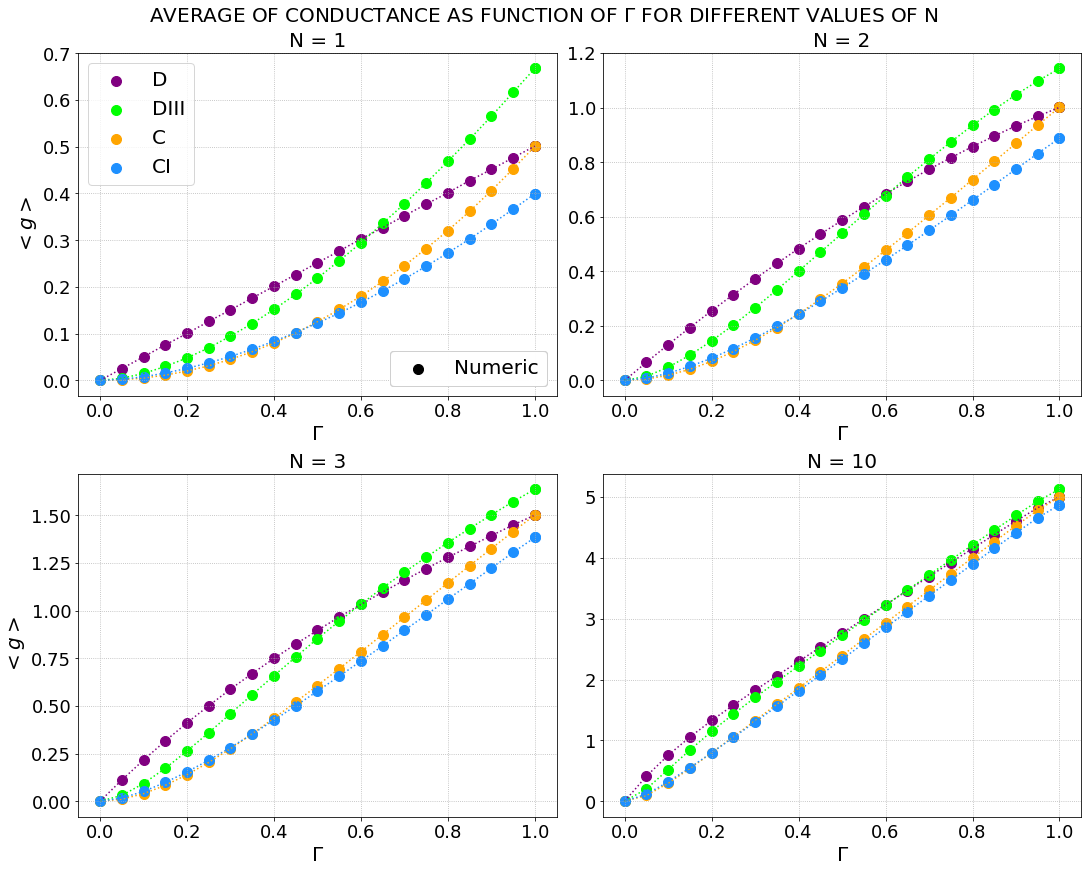

In [64]:
fig, axs = plt.subplots(2,2, figsize = (15,12), constrained_layout = True)

fig.suptitle(r'AVERAGE OF CONDUCTANCE AS FUNCTION OF $\Gamma$ FOR DIFFERENT VALUES OF N', fontsize = 20)

N = 1

for i in range(0,2):
    for j in range(0,2):
        
        if (i == 0) and (j == 0):
            axs[0,0].set_title('N = 1', fontsize = 20)
            axs[0,0].set_ylabel(r'$<g>$', fontsize = 20)
            
            variable_D = meanG_D_1; variable_DIII = meanG_DIII_1; variable_C = meanG_C_1; variable_CI = meanG_CI_1
            
        else:
            if (i == 1) and (j == 0):
  
                axs[1,0].set_title('N = 3', fontsize = 20)
                axs[1,0].set_ylabel(r'$<g>$', fontsize = 20)
            
                variable_D = meanG_D_3; variable_DIII = meanG_DIII_3; variable_C = meanG_C_3; variable_CI = meanG_CI_3
            
            else:
                if (i == 0) and (j == 1):
                    
                    axs[0,1].set_title('N = 2', fontsize = 20)
                    
                    variable_D = meanG_D_2; variable_DIII = meanG_DIII_2; variable_C = meanG_C_2; variable_CI = meanG_CI_2
                    
                else:
                    if (i == 1) and (j == 1):
                        axs[1,1].set_title('N = 10', fontsize = 20)

                        variable_D = meanG_D_10; variable_DIII = meanG_DIII_10; variable_C = meanG_C_10; variable_CI = meanG_CI_10
        
        for k in range(0,len(meanG_D_1)):
            axs[i,j].scatter((k)/20, variable_D[k], s = 100, color = 'purple', alpha = 1)
            axs[i,j].scatter((k)/20, variable_DIII[k], s = 100, color = 'lime', alpha = 1)
            axs[i,j].scatter((k)/20, variable_C[k], s = 100, color = 'orange', alpha = 1)
            axs[i,j].scatter((k)/20, variable_CI[k], s = 100, color = 'dodgerblue', alpha = 1)
            
            if k == (len(meanG_D_1)-1):
                Numeric_scatter = axs[i,j].scatter((k)/20, variable_D[k], label = 'Numeric', s = 100, color = 'black', alpha = 1)
                Class_D = axs[i,j].scatter((k)/20, variable_D[k], label = r'$D$', s = 100, color = 'purple', alpha = 1)
                Class_DIII = axs[i,j].scatter((k)/20, variable_DIII[k], label = r'$DIII$', s = 100, color = 'lime', alpha = 1)
                Class_C = axs[i,j].scatter((k)/20, variable_C[k], label = r'$C$', s = 100, color = 'orange', alpha = 1)
                Class_CI = axs[i,j].scatter((k)/20, variable_CI[k], label = r'$CI$', s = 100, color = 'dodgerblue', alpha = 1)

        axs[i,j].plot([i/20 for i in range(0,21)], variable_D, color = 'purple', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_DIII, color = 'lime', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_C, color = 'orange', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_CI, color = 'dodgerblue', linestyle = ':')
        
        axs[i,j].grid(linestyle=':')
        
        first_legend = axs[0,0].legend([Numeric_scatter], ["Numeric"], loc = "lower right", fontsize = 20)
        axs[0,0].add_artist(first_legend)
        axs[0,0].legend([Class_D, Class_DIII, Class_C, Class_CI], [r'D', r'DIII',r'C',r'CI'], loc = "upper left", fontsize = 20)

        axs[i,j].set_xlabel(r'$\Gamma$', fontsize = 20)
        axs[i,j].tick_params(axis = 'both', which = 'major', labelsize = 18)
        N = N + 1

In [65]:
df_P_D_Gamma_N1 = pd.read_csv(r'Gamma/Andreev_P_D_Gamma_N1.txt', sep='\t', header = None)
df_P_DIII_Gamma_N1 = (1/2)*pd.read_csv(r'Gamma/Andreev_P_DIII_Gamma_N1.txt', sep='\t', header = None)
df_P_C_Gamma_N1 = (1/2)*pd.read_csv(r'Gamma/Andreev_P_C_Gamma_N1.txt', sep='\t', header = None)
df_P_CI_Gamma_N1 = (1/2)*pd.read_csv(r'Gamma/Andreev_P_CI_Gamma_N1.txt', sep='\t', header = None)

df_P_D_Gamma_N2 = pd.read_csv(r'Gamma/Andreev_P_D_Gamma_N2.txt', sep='\t', header = None)
df_P_DIII_Gamma_N2 = (1/2)*pd.read_csv(r'Gamma/Andreev_P_DIII_Gamma_N2.txt', sep='\t', header = None)
df_P_C_Gamma_N2 = (1/2)*pd.read_csv(r'Gamma/Andreev_P_C_Gamma_N2.txt', sep='\t', header = None)
df_P_CI_Gamma_N2 = (1/2)*pd.read_csv(r'Gamma/Andreev_P_CI_Gamma_N2.txt', sep='\t', header = None)

df_P_D_Gamma_N3 = pd.read_csv(r'Gamma/Andreev_P_D_Gamma_N3.txt', sep='\t', header = None)
df_P_DIII_Gamma_N3 = (1/2)*pd.read_csv(r'Gamma/Andreev_P_DIII_Gamma_N3.txt', sep='\t', header = None)
df_P_C_Gamma_N3 = (1/2)*pd.read_csv(r'Gamma/Andreev_P_C_Gamma_N3.txt', sep='\t', header = None)
df_P_CI_Gamma_N3 = (1/2)*pd.read_csv(r'Gamma/Andreev_P_CI_Gamma_N3.txt', sep='\t', header = None)

df_P_D_Gamma_N10 = pd.read_csv(r'Gamma/Andreev_P_D_Gamma_N10.txt', sep='\t', header = None)
df_P_DIII_Gamma_N10 = (1/2)*pd.read_csv(r'Gamma/Andreev_P_DIII_Gamma_N10.txt', sep='\t', header = None)
df_P_C_Gamma_N10 = (1/2)*pd.read_csv(r'Gamma/Andreev_P_C_Gamma_N10.txt', sep='\t', header = None)
df_P_CI_Gamma_N10 = (1/2)*pd.read_csv(r'Gamma/Andreev_P_CI_Gamma_N10.txt', sep='\t', header = None)

P_D_Gamma_N1 = df_P_D_Gamma_N1.values
P_DIII_Gamma_N1 = df_P_DIII_Gamma_N1.values
P_C_Gamma_N1 = df_P_C_Gamma_N1.values
P_CI_Gamma_N1 = df_P_CI_Gamma_N1.values

P_D_Gamma_N2 = df_P_D_Gamma_N2.values
P_DIII_Gamma_N2 = df_P_DIII_Gamma_N2.values
P_C_Gamma_N2 = df_P_C_Gamma_N2.values
P_CI_Gamma_N2 = df_P_CI_Gamma_N2.values

P_D_Gamma_N3 = df_P_D_Gamma_N3.values
P_DIII_Gamma_N3 = df_P_DIII_Gamma_N3.values
P_C_Gamma_N3 = df_P_C_Gamma_N3.values
P_CI_Gamma_N3 = df_P_CI_Gamma_N3.values

P_D_Gamma_N10 = df_P_D_Gamma_N10.values
P_DIII_Gamma_N10 = df_P_DIII_Gamma_N10.values
P_C_Gamma_N10 = df_P_C_Gamma_N10.values
P_CI_Gamma_N10 = df_P_CI_Gamma_N10.values

In [66]:
meanP_D_1 = np.mean(P_D_Gamma_N1, axis = 0)
meanP_DIII_1 = np.mean(P_DIII_Gamma_N1, axis = 0)
meanP_C_1 = np.mean(P_C_Gamma_N1, axis = 0)
meanP_CI_1 = np.mean(P_CI_Gamma_N1, axis = 0)

meanP_D_2 = np.mean(P_D_Gamma_N2, axis = 0)
meanP_DIII_2 = np.mean(P_DIII_Gamma_N2, axis = 0)
meanP_C_2 = np.mean(P_C_Gamma_N2, axis = 0)
meanP_CI_2 = np.mean(P_CI_Gamma_N2, axis = 0)

meanP_D_3 = np.mean(P_D_Gamma_N3, axis = 0)
meanP_DIII_3 = np.mean(P_DIII_Gamma_N3, axis = 0)
meanP_C_3 = np.mean(P_C_Gamma_N3, axis = 0)
meanP_CI_3 = np.mean(P_CI_Gamma_N3, axis = 0)

meanP_D_10 = np.mean(P_D_Gamma_N10, axis = 0)
meanP_DIII_10 = np.mean(P_DIII_Gamma_N10, axis = 0)
meanP_C_10 = np.mean(P_C_Gamma_N10, axis = 0)
meanP_CI_10 = np.mean(P_CI_Gamma_N10, axis = 0)

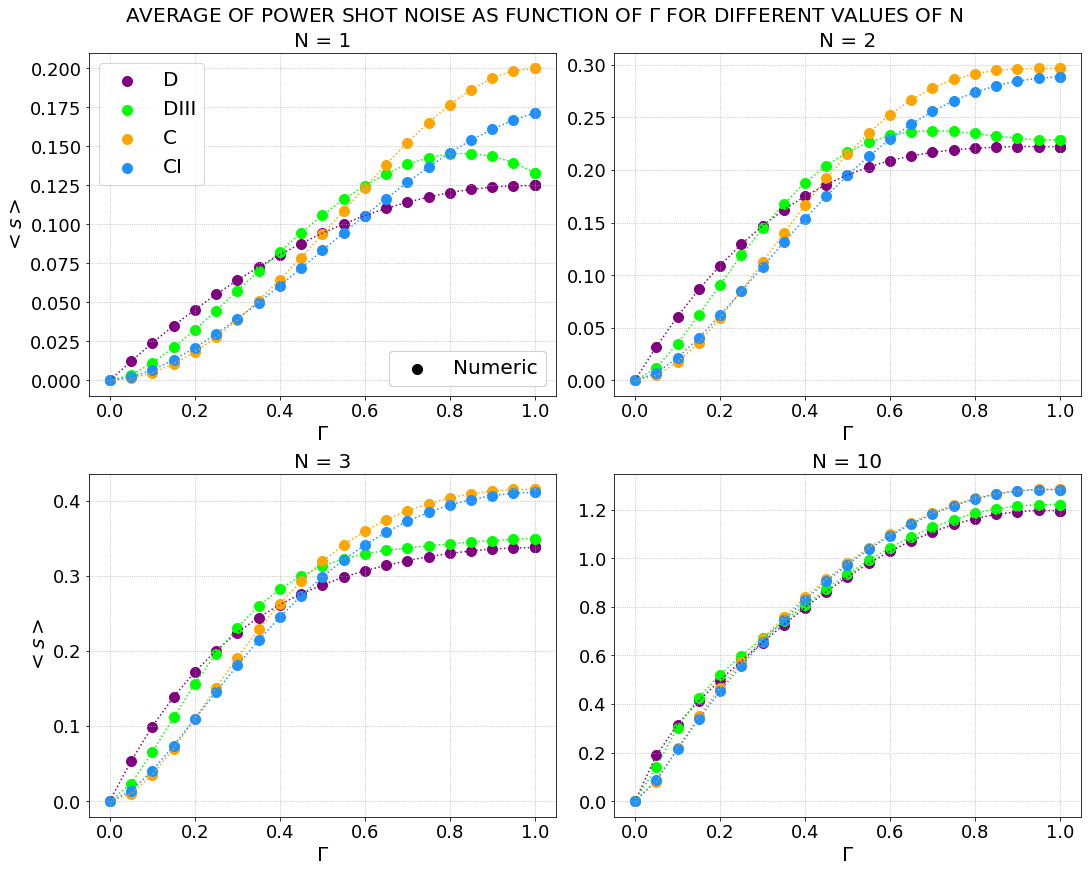

In [67]:
fig, axs = plt.subplots(2,2, figsize = (15,12), constrained_layout = True)

fig.suptitle(r'AVERAGE OF POWER SHOT NOISE AS FUNCTION OF $\Gamma$ FOR DIFFERENT VALUES OF N', fontsize = 20)

N = 1

for i in range(0,2):
    for j in range(0,2):
        
        if (i == 0) and (j == 0):
            axs[0,0].set_title('N = 1', fontsize = 20)
            axs[0,0].set_ylabel(r'$<s>$', fontsize = 20)
            
            variable_D = meanP_D_1; variable_DIII = meanP_DIII_1; variable_C = meanP_C_1; variable_CI = meanP_CI_1
            
        else:
            if (i == 1) and (j == 0):
  
                axs[1,0].set_title('N = 3', fontsize = 20)
                axs[1,0].set_ylabel(r'$<s>$', fontsize = 20)
            
                variable_D = meanP_D_3; variable_DIII = meanP_DIII_3; variable_C = meanP_C_3; variable_CI = meanP_CI_3
            
            else:
                if (i == 0) and (j == 1):
                    
                    axs[0,1].set_title('N = 2', fontsize = 20)
                    
                    variable_D = meanP_D_2; variable_DIII = meanP_DIII_2; variable_C = meanP_C_2; variable_CI = meanP_CI_2
                    
                else:
                    if (i == 1) and (j == 1):
                        axs[1,1].set_title('N = 10', fontsize = 20)

                        variable_D = meanP_D_10; variable_DIII = meanP_DIII_10; variable_C = meanP_C_10; variable_CI = meanP_CI_10
        
        for k in range(0,len(meanG_D_1)):
            axs[i,j].scatter((k)/20, variable_D[k], s = 100, color = 'purple', alpha = 1)
            axs[i,j].scatter((k)/20, variable_DIII[k], s = 100, color = 'lime', alpha = 1)
            axs[i,j].scatter((k)/20, variable_C[k], s = 100, color = 'orange', alpha = 1)
            axs[i,j].scatter((k)/20, variable_CI[k], s = 100, color = 'dodgerblue', alpha = 1)
            
            if k == (len(meanG_D_1)-1):
                Numeric_scatter = axs[i,j].scatter((k)/20, variable_D[k], label = 'Numeric', s = 100, color = 'black', alpha = 1)
                Class_D = axs[i,j].scatter((k)/20, variable_D[k], label = r'$D$', s = 100, color = 'purple', alpha = 1)
                Class_DIII = axs[i,j].scatter((k)/20, variable_DIII[k], label = r'$DIII$', s = 100, color = 'lime', alpha = 1)
                Class_C = axs[i,j].scatter((k)/20, variable_C[k], label = r'$C$', s = 100, color = 'orange', alpha = 1)
                Class_CI = axs[i,j].scatter((k)/20, variable_CI[k], label = r'$CI$', s = 100, color = 'dodgerblue', alpha = 1)

        axs[i,j].plot([i/20 for i in range(0,21)], variable_D, color = 'purple', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_DIII, color = 'lime', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_C, color = 'orange', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_CI, color = 'dodgerblue', linestyle = ':')
        
        axs[i,j].grid(linestyle=':')
        
        #if (i == 1 and j == 1):
        #    N = 10
        #    Exact_plot, = axs[1,1].plot([i/20 for i in range(0,21)], [(N/8)*(i/20)*(2-(i/20)) for i in range(0,21)], label = 'Exact', color = 'black', linestyle = '-', linewidth = 2)
        
        first_legend = axs[0,0].legend([Numeric_scatter], ["Numeric"], loc = "lower right", fontsize = 20)
        axs[0,0].add_artist(first_legend)
        axs[0,0].legend([Class_D, Class_DIII, Class_C, Class_CI], [r'D', r'DIII',r'C',r'CI'], loc = "upper left", fontsize = 20)

        axs[i,j].set_xlabel(r'$\Gamma$', fontsize = 20)
        axs[i,j].tick_params(axis = 'both', which = 'major', labelsize = 18)
        N = N + 1

In [68]:
varG_D_1 = np.var(G_D_Gamma_N1, axis = 0)
varG_DIII_1 = np.var(G_DIII_Gamma_N1, axis = 0)
varG_C_1 = np.var(G_C_Gamma_N1, axis = 0)
varG_CI_1 = np.var(G_CI_Gamma_N1, axis = 0)

varG_D_2 = np.var(G_D_Gamma_N2, axis = 0)
varG_DIII_2 = np.var(G_DIII_Gamma_N2, axis = 0)
varG_C_2 = np.var(G_C_Gamma_N2, axis = 0)
varG_CI_2 = np.var(G_CI_Gamma_N2, axis = 0)

varG_D_3 = np.var(G_D_Gamma_N3, axis = 0)
varG_DIII_3 = np.var(G_DIII_Gamma_N3, axis = 0)
varG_C_3 = np.var(G_C_Gamma_N3, axis = 0)
varG_CI_3 = np.var(G_CI_Gamma_N3, axis = 0)

varG_D_10 = np.var(G_D_Gamma_N10, axis = 0)
varG_DIII_10 = np.var(G_DIII_Gamma_N10, axis = 0)
varG_C_10 = np.var(G_C_Gamma_N10, axis = 0)
varG_CI_10 = np.var(G_CI_Gamma_N10, axis = 0)

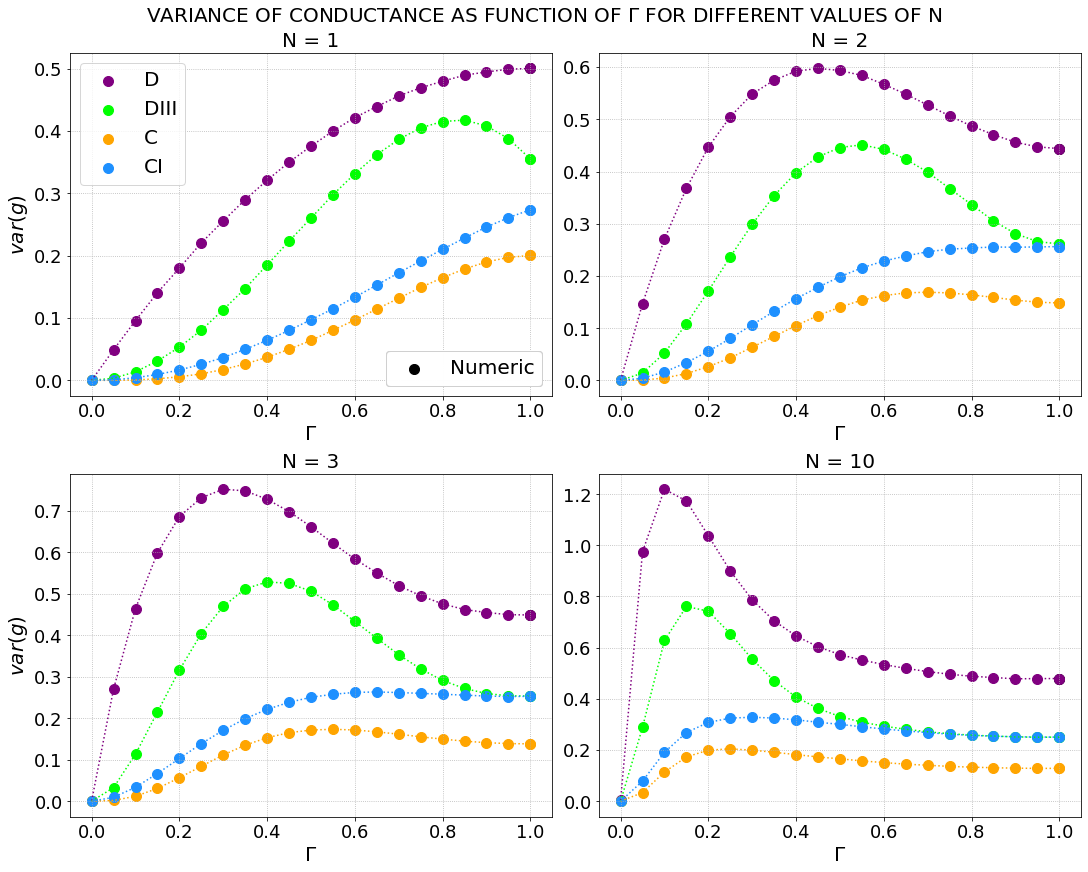

In [69]:
fig, axs = plt.subplots(2,2, figsize = (15,12), constrained_layout = True)

fig.suptitle(r'VARIANCE OF CONDUCTANCE AS FUNCTION OF $\Gamma$ FOR DIFFERENT VALUES OF N', fontsize = 20)

N = 1

for i in range(0,2):
    for j in range(0,2):
        
        if (i == 0) and (j == 0):
            axs[0,0].set_title('N = 1', fontsize = 20)
            axs[0,0].set_ylabel(r'$var(g)$', fontsize = 20)
            
            variable_D = 4*varG_D_1; variable_DIII = 4*varG_DIII_1; variable_C = 4*varG_C_1; variable_CI = 4*varG_CI_1
            
        else:
            if (i == 1) and (j == 0):
  
                axs[1,0].set_title('N = 3', fontsize = 20)
                axs[1,0].set_ylabel(r'$var(g)$', fontsize = 20)
            
                variable_D = 4*varG_D_3; variable_DIII = 4*varG_DIII_3; variable_C = 4*varG_C_3; variable_CI = 4*varG_CI_3
            
            else:
                if (i == 0) and (j == 1):
                    
                    axs[0,1].set_title('N = 2', fontsize = 20)
                    
                    variable_D = 4*varG_D_2; variable_DIII = 4*varG_DIII_2; variable_C = 4*varG_C_2; variable_CI = 4*varG_CI_2
                    
                else:
                    if (i == 1) and (j == 1):
                        axs[1,1].set_title('N = 10', fontsize = 20)

                        variable_D = 4*varG_D_10; variable_DIII = 4*varG_DIII_10; variable_C = 4*varG_C_10; variable_CI = 4*varG_CI_10
        
        for k in range(0,len(meanG_D_1)):
            axs[i,j].scatter((k)/20, variable_D[k], s = 100, color = 'purple', alpha = 1)
            axs[i,j].scatter((k)/20, variable_DIII[k], s = 100, color = 'lime', alpha = 1)
            axs[i,j].scatter((k)/20, variable_C[k], s = 100, color = 'orange', alpha = 1)
            axs[i,j].scatter((k)/20, variable_CI[k], s = 100, color = 'dodgerblue', alpha = 1)
            
            if k == (len(meanG_D_1)-1):
                Numeric_scatter = axs[i,j].scatter((k)/20, variable_D[k], label = 'Numeric', s = 100, color = 'black', alpha = 1)
                Class_D = axs[i,j].scatter((k)/20, variable_D[k], label = r'$D$', s = 100, color = 'purple', alpha = 1)
                Class_DIII = axs[i,j].scatter((k)/20, variable_DIII[k], label = r'$DIII$', s = 100, color = 'lime', alpha = 1)
                Class_C = axs[i,j].scatter((k)/20, variable_C[k], label = r'$C$', s = 100, color = 'orange', alpha = 1)
                Class_CI = axs[i,j].scatter((k)/20, variable_CI[k], label = r'$CI$', s = 100, color = 'dodgerblue', alpha = 1)

        axs[i,j].plot([i/20 for i in range(0,21)], variable_D, color = 'purple', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_DIII, color = 'lime', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_C, color = 'orange', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_CI, color = 'dodgerblue', linestyle = ':')
        
        axs[i,j].grid(linestyle=':')
        
        first_legend = axs[0,0].legend([Numeric_scatter], ["Numeric"], loc = "lower right", fontsize = 20)
        axs[0,0].add_artist(first_legend)
        axs[0,0].legend([Class_D, Class_DIII, Class_C, Class_CI], [r'D', r'DIII',r'C',r'CI'], loc = "upper left", fontsize = 20)

        axs[i,j].set_xlabel(r'$\Gamma$', fontsize = 20)
        axs[i,j].tick_params(axis = 'both', which = 'major', labelsize = 18)
        N = N + 1

In [70]:
varP_D_1 = np.var(P_D_Gamma_N1, axis = 0)
varP_DIII_1 = np.var(P_DIII_Gamma_N1, axis = 0)
varP_C_1 = np.var(P_C_Gamma_N1, axis = 0)
varP_CI_1 = np.var(P_CI_Gamma_N1, axis = 0)

varP_D_2 = np.var(P_D_Gamma_N2, axis = 0)
varP_DIII_2 = np.var(P_DIII_Gamma_N2, axis = 0)
varP_C_2 = np.var(P_C_Gamma_N2, axis = 0)
varP_CI_2 = np.var(P_CI_Gamma_N2, axis = 0)

varP_D_3 = np.var(P_D_Gamma_N3, axis = 0)
varP_DIII_3 = np.var(P_DIII_Gamma_N3, axis = 0)
varP_C_3 = np.var(P_C_Gamma_N3, axis = 0)
varP_CI_3 = np.var(P_CI_Gamma_N3, axis = 0)

varP_D_10 = np.var(P_D_Gamma_N10, axis = 0)
varP_DIII_10 = np.var(P_DIII_Gamma_N10, axis = 0)
varP_C_10 = np.var(P_C_Gamma_N10, axis = 0)
varP_CI_10 = np.var(P_CI_Gamma_N10, axis = 0)

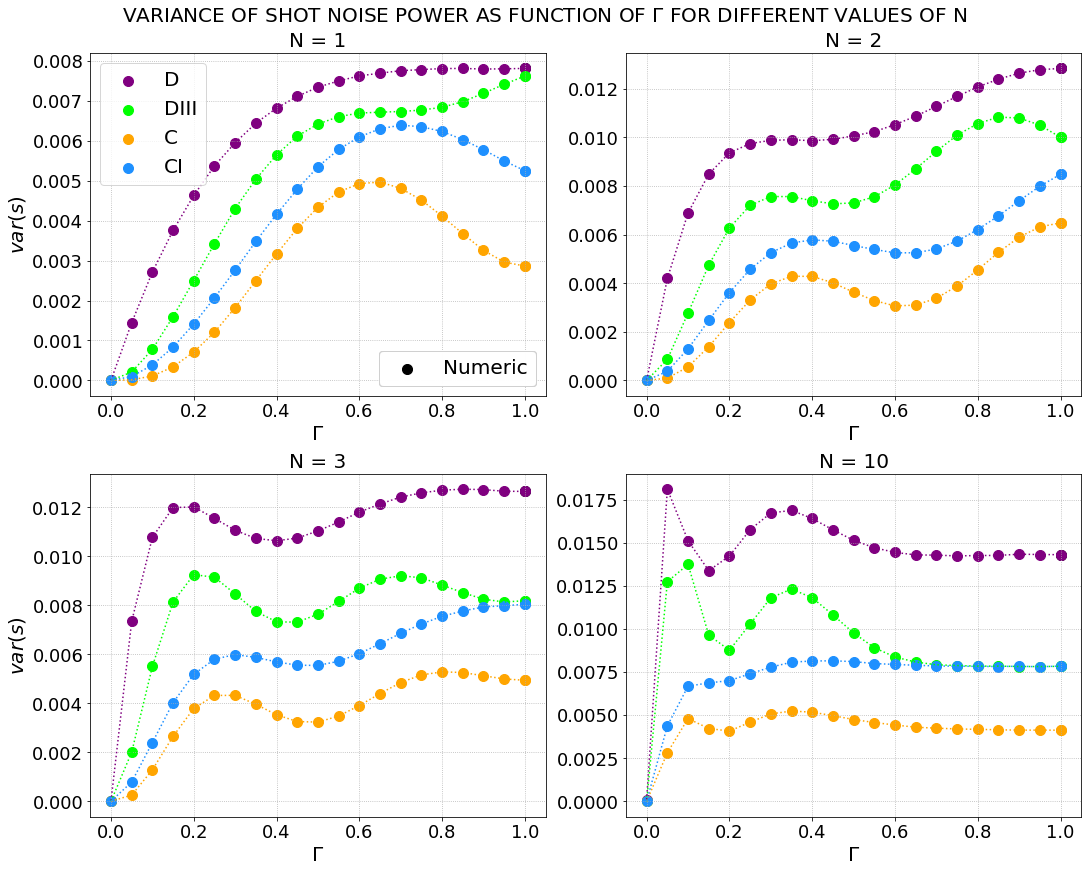

In [71]:
fig, axs = plt.subplots(2,2, figsize = (15,12), constrained_layout = True)

fig.suptitle(r'VARIANCE OF SHOT NOISE POWER AS FUNCTION OF $\Gamma$ FOR DIFFERENT VALUES OF N', fontsize = 20)

N = 1

for i in range(0,2):
    for j in range(0,2):
        
        if (i == 0) and (j == 0):
            axs[0,0].set_title('N = 1', fontsize = 20)
            axs[0,0].set_ylabel(r'$var(s)$', fontsize = 20)
            
            variable_D = varP_D_1; variable_DIII = varP_DIII_1; variable_C = varP_C_1; variable_CI = varP_CI_1
            
        else:
            if (i == 1) and (j == 0):
  
                axs[1,0].set_title('N = 3', fontsize = 20)
                axs[1,0].set_ylabel(r'$var(s)$', fontsize = 20)
            
                variable_D = varP_D_3; variable_DIII = varP_DIII_3; variable_C = varP_C_3; variable_CI = varP_CI_3
            
            else:
                if (i == 0) and (j == 1):
                    
                    axs[0,1].set_title('N = 2', fontsize = 20)
                    
                    variable_D = varP_D_2; variable_DIII = varP_DIII_2; variable_C = varP_C_2; variable_CI = varP_CI_2
                    
                else:
                    if (i == 1) and (j == 1):
                        axs[1,1].set_title('N = 10', fontsize = 20)

                        variable_D = varP_D_10; variable_DIII = varP_DIII_10; variable_C = varP_C_10; variable_CI = varP_CI_10
        
        for k in range(0,len(meanG_D_1)):
            axs[i,j].scatter((k)/20, variable_D[k], s = 100, color = 'purple', alpha = 1)
            axs[i,j].scatter((k)/20, variable_DIII[k], s = 100, color = 'lime', alpha = 1)
            axs[i,j].scatter((k)/20, variable_C[k], s = 100, color = 'orange', alpha = 1)
            axs[i,j].scatter((k)/20, variable_CI[k], s = 100, color = 'dodgerblue', alpha = 1)
            
            if k == (len(meanG_D_1)-1):
                Numeric_scatter = axs[i,j].scatter((k)/20, variable_D[k], label = 'Numeric', s = 100, color = 'black', alpha = 1)
                Class_D = axs[i,j].scatter((k)/20, variable_D[k], label = r'$D$', s = 100, color = 'purple', alpha = 1)
                Class_DIII = axs[i,j].scatter((k)/20, variable_DIII[k], label = r'$DIII$', s = 100, color = 'lime', alpha = 1)
                Class_C = axs[i,j].scatter((k)/20, variable_C[k], label = r'$C$', s = 100, color = 'orange', alpha = 1)
                Class_CI = axs[i,j].scatter((k)/20, variable_CI[k], label = r'$CI$', s = 100, color = 'dodgerblue', alpha = 1)

        axs[i,j].plot([i/20 for i in range(0,21)], variable_D, color = 'purple', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_DIII, color = 'lime', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_C, color = 'orange', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_CI, color = 'dodgerblue', linestyle = ':')
        
        axs[i,j].grid(linestyle=':')
        
        first_legend = axs[0,0].legend([Numeric_scatter], ["Numeric"], loc = "lower right", fontsize = 20)
        axs[0,0].add_artist(first_legend)
        axs[0,0].legend([Class_D, Class_DIII, Class_C, Class_CI], [r'D', r'DIII',r'C',r'CI'], loc = "upper left", fontsize = 20)

        axs[i,j].set_xlabel(r'$\Gamma$', fontsize = 20)
        axs[i,j].tick_params(axis = 'both', which = 'major', labelsize = 18)
        N = N + 1

/home/rafael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/rafael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars


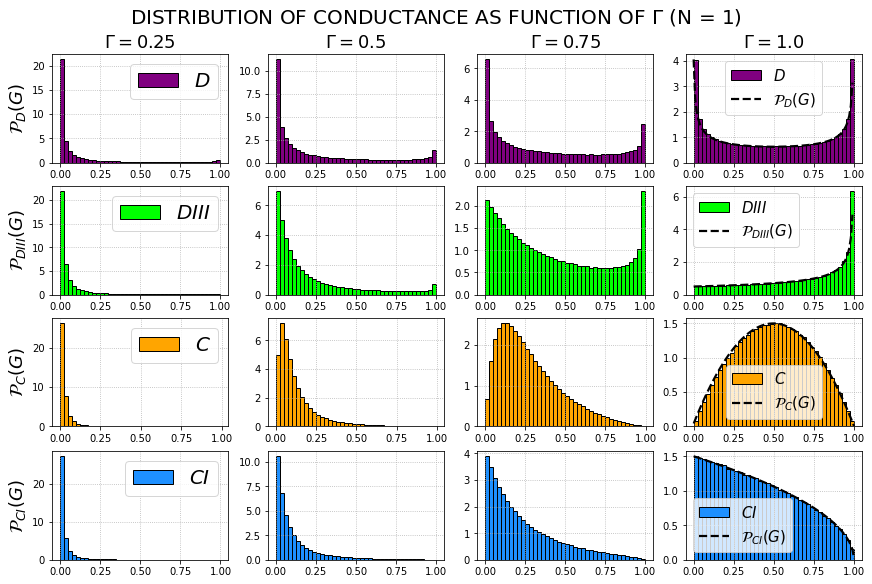

In [72]:
fig, axs = plt.subplots(4,4, figsize = (12,8), constrained_layout = True)

fig.suptitle(r'DISTRIBUTION OF CONDUCTANCE AS FUNCTION OF $\Gamma$ (N = 1)', fontsize = 20)

for j in range(0,4):
    
    gamma_idx = 5*j+5
    
    gamma_value = 0.25*gamma_idx/5
    
    axs[0,j].hist(G_D_Gamma_N1[:,gamma_idx], bins = 40, color='purple', label = r'$D$', alpha=1, density = True, histtype='bar', ec='black');
    axs[1,j].hist(G_DIII_Gamma_N1[:,gamma_idx], bins = 40, color='lime', label = r'$DIII$', alpha=1, density = True, histtype='bar', ec='black');
    axs[2,j].hist(G_C_Gamma_N1[:,gamma_idx], bins = 40, color='orange', label = r'$C$', alpha=1, density = True, histtype='bar', ec='black');
    axs[3,j].hist(G_CI_Gamma_N1[:,gamma_idx], bins = 40, color='dodgerblue', label = r'$CI$', alpha=1, density = True, histtype='bar', ec='black');
    
    if (j == 3):
        x_D = np.linspace(np.min(G_D[:,0]), np.max(G_D[:,0]), 100)
        axs[0,3].plot(x_D, Distr_D_N1(G_D[:,0]), color = 'black', label = r'$\mathcal{P}_{D}(G)$', alpha = 1, linewidth = 2.2, linestyle = 'dashed')
        axs[0,3].legend(fontsize = 15, loc = "best")
            
        x_DIII = np.linspace(np.min(G_DIII[:,0]), np.max(G_DIII[:,0]), 100)
        axs[1,3].plot(x_DIII, Distr_DIII_N1(G_DIII[:,0]), color = 'black', label = r'$\mathcal{P}_{DIII}(G)$', alpha = 1, linewidth = 2.2, linestyle = 'dashed')
        axs[1,3].legend(fontsize = 15, loc = "best")
                
        x_C = np.linspace(np.min(G_C[:,0]), np.max(G_C[:,0]), 100)
        axs[2,3].plot(x_C, Distr_C_N1(G_C[:,0]), color = 'black', label = r'$\mathcal{P}_{C}(G)$', alpha = 1, linewidth = 2.2, linestyle = 'dashed')
        axs[2,3].legend(fontsize = 15, loc = "best")

        x_CI = np.linspace(np.min(G_CI[:,0]), np.max(G_CI[:,0]), 100)
        axs[3,3].plot(x_CI, Distr_CI_N1(G_CI[:,0]), color = 'black', label = r'$\mathcal{P}_{CI}(G)$', alpha = 1, linewidth = 2.2, linestyle = 'dashed')
        axs[3,3].legend(fontsize = 15, loc = "best")
    
    axs[0,j].set_title(r'$\Gamma = $'+ str(gamma_value), fontsize = 18)
    
    axs[0,0].set_ylabel(r'$\mathcal{P}_{D}(G)$', fontsize = 18)
    axs[1,0].set_ylabel(r'$\mathcal{P}_{DIII}(G)$', fontsize = 18)
    axs[2,0].set_ylabel(r'$\mathcal{P}_{C}(G)$', fontsize = 18)
    axs[3,0].set_ylabel(r'$\mathcal{P}_{CI}(G)$', fontsize = 18)
    
    for i in range(0,4):
        axs[i,0].legend(fontsize = 20)
        axs[i,j].grid(linestyle=':')
        

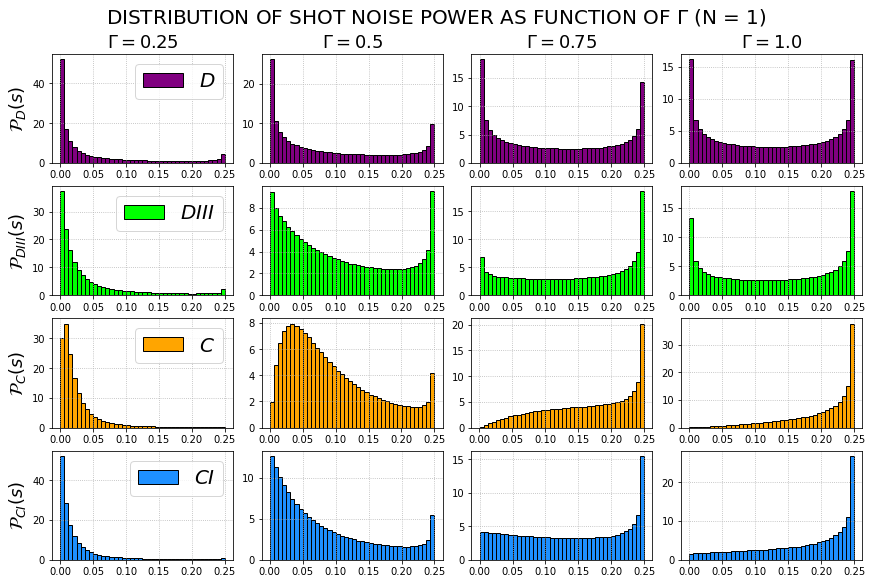

In [73]:
fig, axs = plt.subplots(4,4, figsize = (12,8), constrained_layout = True)

fig.suptitle(r'DISTRIBUTION OF SHOT NOISE POWER AS FUNCTION OF $\Gamma$ (N = 1)', fontsize = 20)

for j in range(0,4):
    
    gamma_idx = 5*j+5
    
    gamma_value = 0.25*gamma_idx/5
    
    axs[0,j].hist(P_D_Gamma_N1[:,gamma_idx], bins = 40, color='purple', label = r'$D$', alpha=1, density = True, histtype='bar', ec='black');
    axs[1,j].hist(P_DIII_Gamma_N1[:,gamma_idx], bins = 40, color='lime', label = r'$DIII$', alpha=1, density = True, histtype='bar', ec='black');
    axs[2,j].hist(P_C_Gamma_N1[:,gamma_idx], bins = 40, color='orange', label = r'$C$', alpha=1, density = True, histtype='bar', ec='black');
    axs[3,j].hist(P_CI_Gamma_N1[:,gamma_idx], bins = 40, color='dodgerblue', label = r'$CI$', alpha=1, density = True, histtype='bar', ec='black');
    
    
    axs[0,j].set_title(r'$\Gamma = $'+ str(gamma_value), fontsize = 18)
    
    axs[1,0].set_ylabel(r'$\mathcal{P}_{\beta}(s)$', fontsize = 18)
    
    axs[0,0].set_ylabel(r'$\mathcal{P}_{D}(s)$', fontsize = 18)
    axs[1,0].set_ylabel(r'$\mathcal{P}_{DIII}(s)$', fontsize = 18)
    axs[2,0].set_ylabel(r'$\mathcal{P}_{C}(s)$', fontsize = 18)
    axs[3,0].set_ylabel(r'$\mathcal{P}_{CI}(s)$', fontsize = 18)
    
    #if (j == 3):
        #x_D = np.linspace(np.min(P_D[:,0]), np.max(P_D[:,0]), 200)
        #axs[0,3].plot(x_D, Distr_D_N1_Noise(P_D[:,0]), color = 'black', label = r'$\mathcal{P}_{D}(s)$', alpha = 1, linewidth = 2.2, linestyle = 'dashed')
        #axs[0,3].legend(fontsize = 15, loc = "best")
            
        #x_DIII = np.linspace(np.min(P_DIII[:,0]), np.max(P_DIII[:,0]), 200)
        #axs[1,3].plot(x_DIII, Distr_DIII_N1_Noise(P_DIII[:,0]), color = 'black', label = r'$\mathcal{P}_{DIII}(s)$', alpha = 1, linewidth = 2.2, linestyle = 'dashed')
        #axs[1,3].legend(fontsize = 15, loc = "best")
                
        #x_C = np.linspace(np.min(P_C[:,0]), np.max(P_C[:,0]), 200)
        #axs[2,3].plot(x_C, Distr_C_N1_Noise(P_C[:,0]), color = 'black', label = r'$\mathcal{P}_{C}(s)$', alpha = 1, linewidth = 2.2, linestyle = 'dashed')
        #axs[2,3].legend(fontsize = 15, loc = "best")

        #x_CI = np.linspace(np.min(P_CI[:,0]), np.max(P_CI[:,0]), 200)
        #axs[3,3].plot(x_CI, Distr_CI_N1_Noise(P_CI[:,0]), color = 'black', label = r'$\mathcal{P}_{CI}(s)$', alpha = 1, linewidth = 2.2, linestyle = 'dashed')
        #axs[3,3].legend(fontsize = 15, loc = "best")
    
    for i in range(0,4):
        axs[i,0].legend(fontsize = 20)
        axs[i,j].grid(linestyle=':')

In [74]:
meanG_U_1 = [4.42276345e-05, 1.74688624e-02, 3.51545366e-02, 5.40983579e-02, 7.24493113e-02, 9.43385482e-02, 1.13935822e-01, 1.36911921e-01
, 1.58351929e-01, 1.82563785e-01, 2.07181360e-01, 2.32975152e-01,
 2.59490636e-01, 2.86536809e-01, 3.14402916e-01, 3.41832668e-01, 3.72930074e-01, 4.03574574e-01, 4.35441335e-01, 4.67392390e-01,
 4.98967446e-01]

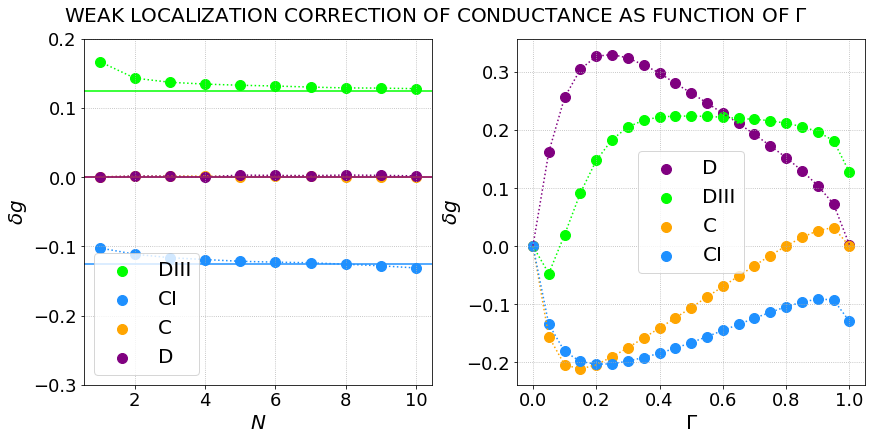

In [93]:
Gamma_variable = [(i/20) for i in range(0,21)]
meanG_D_10_new = [(10*Gamma_variable[i])/2 for i in range(0,21)]

meanG_U = [(i+1)/2 for i in range(10)]

fig, axs = plt.subplots(1,2, figsize = (12,6), constrained_layout = True)

fig.suptitle(r'WEAK LOCALIZATION CORRECTION OF CONDUCTANCE AS FUNCTION OF $\Gamma$', fontsize = 20)

axs[0].plot([i for i in range(1,11)], (meanG_DIII - meanG_U), color = 'lime', linestyle = ':', alpha = 1)
axs[0].plot([i for i in range(1,11)], (meanG_CI - meanG_U), color = 'dodgerblue', linestyle = ':', alpha = 1)
axs[0].plot([i for i in range(1,11)], (meanG_C - meanG_U), color = 'orange', linestyle = ':', alpha = 1)
axs[0].plot([i for i in range(1,11)], (meanG_D - meanG_U), color = 'purple', linestyle = ':', alpha = 1)

axs[0].scatter([i for i in range(1,11)], (meanG_DIII - meanG_U), label = r'DIII' , s = 100, color = 'lime', alpha = 1)
axs[0].scatter([i for i in range(1,11)], (meanG_CI - meanG_U), label = r'CI', s = 100, color = 'dodgerblue', alpha = 1)
axs[0].scatter([i for i in range(1,11)], (meanG_C - meanG_U), label = r'C', s = 100, color = 'orange', alpha = 1)
axs[0].scatter([i for i in range(1,11)], (meanG_D - meanG_U), label = r'D', s = 100, color = 'purple', alpha = 1)

axs[0].set_xlabel('N', fontsize = 20)
axs[0].tick_params(axis = 'both', which = 'major', labelsize = 18)
axs[0].set_ylabel(r'$\delta g$', fontsize = 20)
axs[0].grid(linestyle=':')
axs[0].legend(loc = "lower left", fontsize = 20)

axs[0].axhline(y=-1/8, color='dodgerblue', linestyle='-')
axs[0].axhline(y=0, color='orange', linestyle='-')
axs[0].axhline(y=0, color='purple', linestyle='-')
axs[0].axhline(y=1/8, color='lime', linestyle='-')

axs[0].set_ylim([-0.3, 0.2])
axs[0].set_xlabel(r'$N$', fontsize = 20)

axs[1].plot([(i/20) for i in range(0,21)], (meanG_D_10 - meanG_D_10_new), color = 'purple', linestyle = ':', alpha = 1)
axs[1].plot([(i/20) for i in range(0,21)], (meanG_DIII_10 - meanG_D_10_new), color = 'lime', linestyle = ':', alpha = 1)
axs[1].plot([(i/20) for i in range(0,21)], (meanG_C_10 - meanG_D_10_new), color = 'orange', linestyle = ':', alpha = 1)
axs[1].plot([(i/20) for i in range(0,21)], (meanG_CI_10 - meanG_D_10_new), color = 'dodgerblue', linestyle = ':', alpha = 1)

axs[1].scatter([(i/20) for i in range(0,21)], (meanG_D_10 - meanG_D_10_new), label = 'D', s = 100, color = 'purple', alpha = 1)
axs[1].scatter([(i/20) for i in range(0,21)], (meanG_DIII_10 - meanG_D_10_new), label = 'DIII' , s = 100, color = 'lime', alpha = 1)
axs[1].scatter([(i/20) for i in range(0,21)], (meanG_C_10 - meanG_D_10_new), label = 'C', s = 100, color = 'orange', alpha = 1)
axs[1].scatter([(i/20) for i in range(0,21)], (meanG_CI_10 - meanG_D_10_new), label = 'CI', s = 100, color = 'dodgerblue', alpha = 1)


axs[1].legend(loc = "best", fontsize = 20)

axs[1].set_xlabel(r'$\Gamma$', fontsize = 20)

for i in range(2):
    axs[i].set_ylabel(r'$\delta g$', fontsize = 20)
    axs[i].tick_params(axis = 'both', which = 'major', labelsize = 18)
    axs[i].grid(linestyle=':')

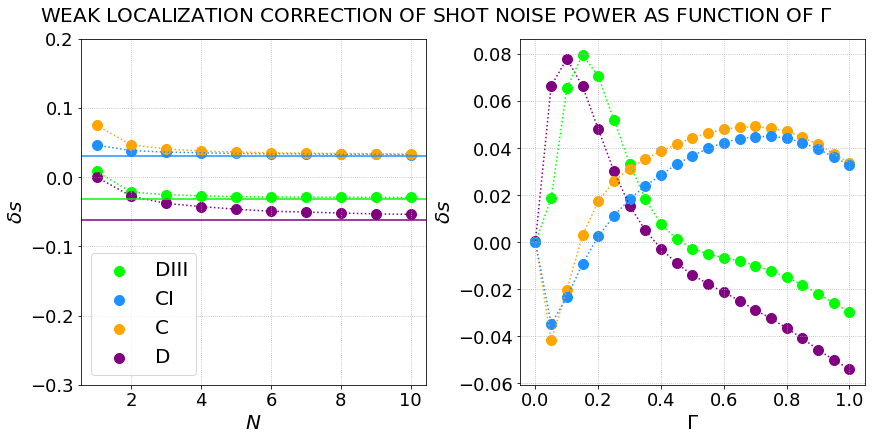

In [105]:
Gamma_variable = [(i/20) for i in range(0,21)]
meanP_D_1_new = [((10*Gamma_variable[i]/8)*(2-Gamma_variable[i])) for i in range(0,21)]
meanP_D_10_new = [((10*Gamma_variable[i]/8)*(2-Gamma_variable[i])) for i in range(0,21)]
meanP_U = [(i+1)/8 for i in range(10)]

fig, axs = plt.subplots(1,2, figsize = (12,6), constrained_layout = True)

fig.suptitle(r'WEAK LOCALIZATION CORRECTION OF SHOT NOISE POWER AS FUNCTION OF $\Gamma$', fontsize = 20)

axs[0].plot([i for i in range(1,11)], (meanP_DIII - meanP_U), color = 'lime', linestyle = ':', alpha = 1)
axs[0].plot([i for i in range(1,11)], (meanP_CI - meanP_U), color = 'dodgerblue', linestyle = ':', alpha = 1)
axs[0].plot([i for i in range(1,11)], (meanP_C - meanP_U), color = 'orange', linestyle = ':', alpha = 1)
axs[0].plot([i for i in range(1,11)], (meanP_D - meanP_U), color = 'purple', linestyle = ':', alpha = 1)

axs[0].scatter([i for i in range(1,11)], (meanP_DIII - meanP_U), label = r'DIII' , s = 100, color = 'lime', alpha = 1)
axs[0].scatter([i for i in range(1,11)], (meanP_CI - meanP_U), label = r'CI', s = 100, color = 'dodgerblue', alpha = 1)
axs[0].scatter([i for i in range(1,11)], (meanP_C - meanP_U), label = r'C', s = 100, color = 'orange', alpha = 1)
axs[0].scatter([i for i in range(1,11)], (meanP_D - meanP_U), label = r'D', s = 100, color = 'purple', alpha = 1)

axs[0].set_xlabel('N', fontsize = 20)
axs[0].tick_params(axis = 'both', which = 'major', labelsize = 18)
axs[0].set_ylabel(r'$\delta g$', fontsize = 20)
axs[0].grid(linestyle=':')
axs[0].legend(loc = "lower left", fontsize = 20)

axs[0].axhline(y=-1/32, color='lime', linestyle='-')
axs[0].axhline(y=-1/16, color='purple', linestyle='-')
axs[0].axhline(y=1/32, color='dodgerblue', linestyle='-')

axs[0].set_ylim([-0.3, 0.2])
axs[0].set_xlabel(r'$N$', fontsize = 20)

axs[1].plot([(i/20) for i in range(0,21)], (meanP_D_10 - meanP_D_10_new), color = 'purple', linestyle = ':', alpha = 1)
axs[1].plot([(i/20) for i in range(0,21)], (meanP_DIII_10 - meanP_D_10_new), color = 'lime', linestyle = ':', alpha = 1)
axs[1].plot([(i/20) for i in range(0,21)], (meanP_C_10 - meanP_D_10_new), color = 'orange', linestyle = ':', alpha = 1)
axs[1].plot([(i/20) for i in range(0,21)], (meanP_CI_10 - meanP_D_10_new), color = 'dodgerblue', linestyle = ':', alpha = 1)

axs[1].scatter([(i/20) for i in range(0,21)], (meanP_D_10 - meanP_D_10_new), label = 'CRE', s = 100, color = 'purple', alpha = 1)
axs[1].scatter([(i/20) for i in range(0,21)], (meanP_DIII_10 - meanP_D_10_new), label = 'T-CRE' , s = 100, color = 'lime', alpha = 1)
axs[1].scatter([(i/20) for i in range(0,21)], (meanP_C_10 - meanP_D_10_new), label = 'CQE', s = 100, color = 'orange', alpha = 1)
axs[1].scatter([(i/20) for i in range(0,21)], (meanP_CI_10 - meanP_D_10_new), label = 'T-CQE', s = 100, color = 'dodgerblue', alpha = 1)

axs[1].set_xlabel(r'$\Gamma$', fontsize = 20)

axs[0].set_ylabel(r'$\delta s$', fontsize = 20)
axs[0].legend(loc = "best", fontsize = 20)

for i in range(2):
    axs[i].set_ylabel(r'$\delta s$', fontsize = 20)
    axs[i].tick_params(axis = 'both', which = 'major', labelsize = 18)
    axs[i].grid(linestyle=':')